In [2]:
import pandas as pd
import numpy as np
# from xgboost import XGBClassifier
# from scipy import stats
# from sklearn.model_selection import train_test_split

In [3]:
ftr= pd.read_csv('./data/train_features.csv')
lb_full = pd.read_csv('./data/train_labels.csv')
test = pd.read_csv('./data/test_features.csv')
sample = pd.read_csv('./data/sample_submission.csv')

lb = lb_full.label

In [9]:
lb_full

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [8]:
ftr.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [5]:
len(ftr.id.unique())

3125

In [6]:
len(ftr.id.unique())*600

1875000

In [7]:
len(ftr)

1875000

## 변수 계산 함수 정의

In [3]:
def rms(col):
    return np.sqrt(np.mean(col.values**2))

def Q3(col):
    return np.percentile(col.values,75)

def Q1(col):
    return np.percentile(col.values,25)

def IQR(col):
    return np.percentile(col.values,75)-np.percentile(col.values,25)

def KS(col):
    return stats.kurtosis(col.values)

def MM(col):
    return max(col.values)-min(col.values)

def zcr(col):
    return (col.values[:-1]*col.values[1:]<0).sum()/(len(col)-1)

In [4]:
def SMA_col(raw, group):
    raw['acc_SMA']=abs(raw.acc_x)+abs(raw.acc_y)+abs(raw.acc_z)
    raw['gy_SMA']=abs(raw.gy_x)+abs(raw.gy_y)+abs(raw.gy_z)
    
    raw['acc_SMA_2']=abs(raw.acc_x_2)+abs(raw.acc_y_2)+abs(raw.acc_z_2)
    raw['gy_SMA_2']=abs(raw.gy_x_2)+abs(raw.gy_y_2)+abs(raw.gy_z_2)
    
    raw['acc_SMA_3']=abs(raw.acc_x_3)+abs(raw.acc_y_3)+abs(raw.acc_z_3)
    raw['gy_SMA_3']=abs(raw.gy_x_3)+abs(raw.gy_y_3)+abs(raw.gy_z_3)
    
    raw_gp = raw[['id','acc_SMA','gy_SMA','acc_SMA_2','gy_SMA_2','acc_SMA_3','gy_SMA_3']].groupby('id').mean()
    
    group[['acc_SMA','gy_SMA','acc_SMA_2','gy_SMA_2','acc_SMA_3','gy_SMA_3']]=raw_gp[['acc_SMA','gy_SMA','acc_SMA_2','gy_SMA_2','acc_SMA_3','gy_SMA_3']]
    
    return group

def SMA_row(raw, group):
    raw['acc_SMA']=abs(raw.acc_x)+abs(raw.acc_y)+abs(raw.acc_z)
    raw['gy_SMA']=abs(raw.gy_x)+abs(raw.gy_y)+abs(raw.gy_z)
    
    raw_gp = raw[['id','acc_SMA','gy_SMA']].groupby(['id']).mean()
    
    group[['acc_SMA','gy_SMA']]=raw_gp[['acc_SMA','gy_SMA']]
    
    return group

In [5]:
df = ftr.merge(lb_full, left_on='id',right_on='id')
df.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell)


In [31]:
df[df.label==37].id.unique()

array([   0,   64,  298,  299,  302,  325,  450,  463,  557,  606,  615,
        777,  986, 1046, 1073, 1196, 1214, 1236, 1273, 1277, 1375, 1531,
       1565, 1594, 1816, 1866, 2372, 2521, 2641, 2714, 2756, 2781, 2782,
       3009, 3053], dtype=int64)

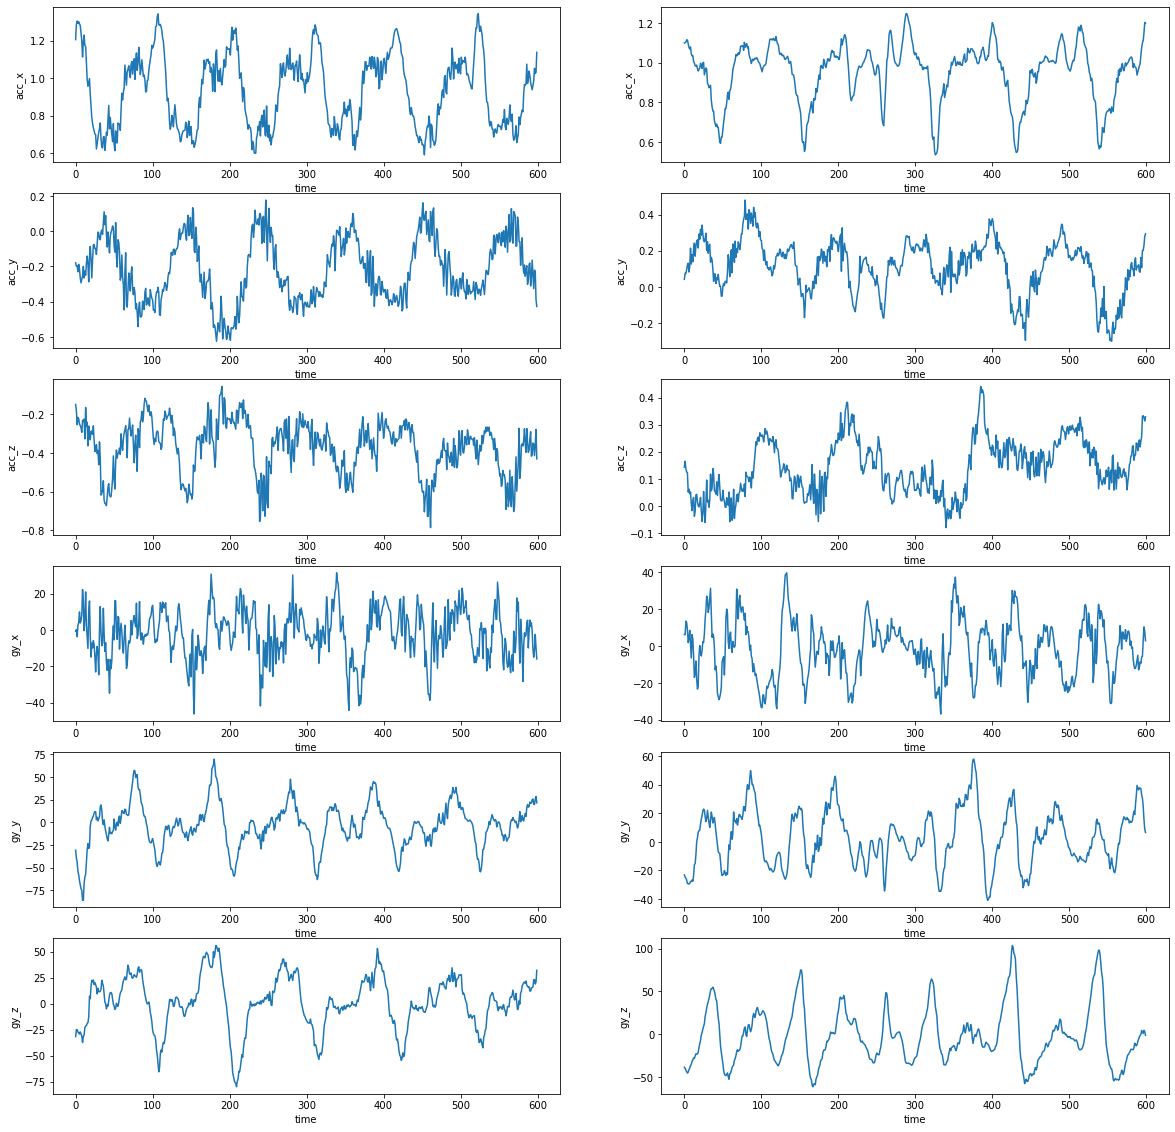

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(20,20),nrows=6, ncols=2)
r1,r2 = 0,0

for move in ftr.iloc[:,2:]:
    plt.figure(figsize=(10,4))
    sns.lineplot(x='time',y=move,data=ftr[ftr.id==0],ax=ax[r1][0])
    r1+=1
    
for move in ftr.iloc[:,2:]:
    plt.figure(figsize=(10,4))
    sns.lineplot(x='time',y=move,data=ftr[ftr.id==64],ax=ax[r2][1])
    r2+=1

plt.show()

C:\Users\shin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


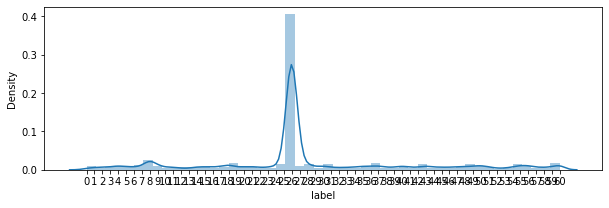

In [7]:
plt.figure(figsize=(10,3))
sns.distplot(df.label)
plt.xticks(df.label.unique())
plt.show()

In [8]:
ftr.time

0            0
1            1
2            2
3            3
4            4
          ... 
1874995    595
1874996    596
1874997    597
1874998    598
1874999    599
Name: time, Length: 1875000, dtype: int64

## 열 기준으로 시간 나누기

In [6]:
def slot(time):
    if 0<= time < 200:
        return 0
    elif 200<= time < 400:
        return 1
    elif 400<= time < 600:
        return 2

In [68]:
ftr.columns

Index(['id', 'time', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z',
       'slot'],
      dtype='object')

In [7]:
ftr['slot']=ftr['time'].apply(lambda x: slot(x))

In [11]:
ftr[ftr.slot==2]

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,slot
400,0,400,1.093638,-0.344989,-0.323044,13.961125,4.720894,31.474076,2
401,0,401,1.106672,-0.335873,-0.288606,17.874052,5.043325,26.424526,2
402,0,402,1.064276,-0.330580,-0.236175,18.816906,4.922722,21.126568,2
403,0,403,1.026103,-0.376373,-0.222396,17.304391,2.004492,16.528449,2
404,0,404,1.102753,-0.380430,-0.256018,16.163792,-2.693145,15.150904,2
...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,2
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,2
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,2
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,2


In [16]:
ftr.columns

Index(['id', 'time', 'acc_x', 'acc_y', 'acc_z', 'gy_x', 'gy_y', 'gy_z',
       'slot'],
      dtype='object')

In [8]:
def timeslot_by_col(df):
    df['slot']=df['time'].apply(lambda x: slot(x)) 
    
    df1 = df[df.slot==0].iloc[:,:-1]
    df2 = df[df.slot==1].iloc[:,2:-1]
    df3 = df[df.slot==2].iloc[:,2:-1]
    
    data = np.concatenate((df1.values, df2.values, df3.values),axis=1)
    
    cols = list(df.iloc[:,:-1].columns) +['acc_x_2', 'acc_y_2', 'acc_z_2', 'gy_x_2', 'gy_y_2', 'gy_z_2']+['acc_x_3', 'acc_y_3', 'acc_z_3', 'gy_x_3', 'gy_y_3', 'gy_z_3']
    
    new_df = pd.DataFrame(data, columns=cols)
    
    return new_df

In [9]:
ftr_n = timeslot_by_col(ftr)

In [10]:
ftr.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,slot
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,0
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,0
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,0
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,0
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,0


In [27]:
ftr[ftr.slot==2]

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,slot
400,0,400,1.093638,-0.344989,-0.323044,13.961125,4.720894,31.474076,2
401,0,401,1.106672,-0.335873,-0.288606,17.874052,5.043325,26.424526,2
402,0,402,1.064276,-0.330580,-0.236175,18.816906,4.922722,21.126568,2
403,0,403,1.026103,-0.376373,-0.222396,17.304391,2.004492,16.528449,2
404,0,404,1.102753,-0.380430,-0.256018,16.163792,-2.693145,15.150904,2
...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,2
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,2
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,2
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,2


In [11]:
ftr_n

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_x_2,acc_y_2,acc_z_2,gy_x_2,gy_y_2,gy_z_2,acc_x_3,acc_y_3,acc_z_3,gy_x_3,gy_y_3,gy_z_3
0,0.0,0.0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1.158168,-0.586620,-0.221962,-1.946347,-39.146044,-33.738979,1.093638,-0.344989,-0.323044,13.961125,4.720894,31.474076
1,0.0,1.0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1.123651,-0.618396,-0.238819,-8.133431,-47.449008,-42.022438,1.106672,-0.335873,-0.288606,17.874052,5.043325,26.424526
2,0.0,2.0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1.208373,-0.549756,-0.247487,-11.211440,-51.701636,-46.162162,1.064276,-0.330580,-0.236175,18.816906,4.922722,21.126568
3,0.0,3.0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1.272519,-0.547113,-0.188881,-8.848100,-51.388840,-55.287924,1.026103,-0.376373,-0.222396,17.304391,2.004492,16.528449
4,0.0,4.0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1.203165,-0.553132,-0.226117,-6.809832,-53.356011,-66.320143,1.102753,-0.380430,-0.256018,16.163792,-2.693145,15.150904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624995,3124.0,195.0,0.450644,-0.848552,0.328207,-8.752304,27.550055,9.046771,-0.901744,-0.488157,0.142310,12.896230,72.054698,34.871881,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
624996,3124.0,196.0,0.424794,-0.839237,0.331059,-10.607895,33.443097,10.947623,-0.901898,-0.499932,0.112720,18.785146,73.578994,33.507362,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
624997,3124.0,197.0,0.395677,-0.829187,0.337846,-10.979553,37.557340,11.625390,-0.915955,-0.488070,0.090333,16.550382,74.517617,32.307900,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
624998,3124.0,198.0,0.396482,-0.835481,0.337350,-9.176439,39.975728,14.522838,-0.933092,-0.477462,0.075154,10.140126,74.710894,33.129408,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [12]:
ftr.drop('slot',axis=1, inplace=True)

In [45]:
ftr_n_gp = ftr_n.drop('time',axis=1).groupby('id').agg(['mean','var','mad',rms,IQR,Q3,KS,MM,'median',Q1,'max','min',zcr])

In [47]:
ftr_n

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_x_2,acc_y_2,acc_z_2,gy_x_2,gy_y_2,gy_z_2,acc_x_3,acc_y_3,acc_z_3,gy_x_3,gy_y_3,gy_z_3
0,0.0,0.0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1.158168,-0.586620,-0.221962,-1.946347,-39.146044,-33.738979,1.093638,-0.344989,-0.323044,13.961125,4.720894,31.474076
1,0.0,1.0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1.123651,-0.618396,-0.238819,-8.133431,-47.449008,-42.022438,1.106672,-0.335873,-0.288606,17.874052,5.043325,26.424526
2,0.0,2.0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1.208373,-0.549756,-0.247487,-11.211440,-51.701636,-46.162162,1.064276,-0.330580,-0.236175,18.816906,4.922722,21.126568
3,0.0,3.0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1.272519,-0.547113,-0.188881,-8.848100,-51.388840,-55.287924,1.026103,-0.376373,-0.222396,17.304391,2.004492,16.528449
4,0.0,4.0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1.203165,-0.553132,-0.226117,-6.809832,-53.356011,-66.320143,1.102753,-0.380430,-0.256018,16.163792,-2.693145,15.150904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624995,3124.0,195.0,0.450644,-0.848552,0.328207,-8.752304,27.550055,9.046771,-0.901744,-0.488157,0.142310,12.896230,72.054698,34.871881,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
624996,3124.0,196.0,0.424794,-0.839237,0.331059,-10.607895,33.443097,10.947623,-0.901898,-0.499932,0.112720,18.785146,73.578994,33.507362,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
624997,3124.0,197.0,0.395677,-0.829187,0.337846,-10.979553,37.557340,11.625390,-0.915955,-0.488070,0.090333,16.550382,74.517617,32.307900,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
624998,3124.0,198.0,0.396482,-0.835481,0.337350,-9.176439,39.975728,14.522838,-0.933092,-0.477462,0.075154,10.140126,74.710894,33.129408,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [52]:
ftr_n_gp = SMA(ftr_n, ftr_n_gp)

In [53]:
ftr_n_gp

acc_x                                                              \
            mean       var       mad       rms       IQR        Q3        KS   
id                                                                             
0.0     0.939629  0.040701  0.177439  0.960937  0.354178  1.090305  1.781707   
1.0    -0.541579  0.256409  0.429614  0.740564  0.726828 -0.150953  3.231726   
2.0     0.206800  0.516682  0.641835  0.746233  1.280398  0.815432  1.784378   
3.0    -0.918718  0.013523  0.089942  0.926012  0.135371 -0.851360  3.890407   
4.0    -0.079400  0.091618  0.260568  0.312193  0.511361  0.157189  2.131237   
...          ...       ...       ...       ...       ...       ...       ...   
3120.0 -0.288550  0.247556  0.431217  0.574090  0.897091  0.117437  2.191499   
3121.0 -0.981668  0.058628  0.195880  1.010944  0.355833 -0.803324  2.687292   
3122.0 -1.095197  0.337772  0.479531  1.239169  0.857204 -0.701768  2.550814   
3123.0 -0.316117  0.071350  0.224283  0.413428  0.424285 -0.114130  2.161936   
3124.0 -0.275555  0.295196  0.498303  0.607989  1.107794  0.266734  1.421789   

                                      ...      gy_z_3                          \
              MM    median        Q1  ...          Q1         max         min   
id                                    ...                                       
0.0     0.729531  0.980503  0.736127  ...  -10.858653   34.581731  -54.523817   
1.0     2.097042 -0.256984 -0.877781  ...  -18.650624  146.241141 -179.306329   
2.0     2.362683  0.579793 -0.464966  ...   -2.915746   30.311097  -31.731169   
3.0     0.660788 -0.919209 -0.986731  ...  -31.240508   35.079761  -67.391967   
4.0     1.430985 -0.076026 -0.354173  ...   -2.687109   93.036460 -270.581913   
...          ...       ...       ...  ...         ...         ...         ...   
3120.0  2.015509 -0.106967 -0.779654  ...   -3.573256    5.796333   -6.670557   
3121.0  1.128804 -0.974358 -1.159156  ...   -2.873715   15.788652   -4.540606   
3122.0  2.886603 -1.077250 -1.558972  ... -118.661809  265.326352 -247.908573   
3123.0  1.093559 -0.290501 -0.538415  ...  -67.981045  310.558507 -133.851484   
3124.0  1.518994 -0.282074 -0.841061  ...  -50.339040   80.302840  -85.111657   

                   acc_SMA      gy_SMA acc_SMA_2    gy_SMA_2 acc_SMA_3  \
             zcr                                                         
id                                                                       
0.0     0.070352  1.534512   51.220488  1.527312   51.445211  1.544064   
1.0     0.070352  1.446532  133.973114  1.618912  236.532704  1.562951   
2.0     0.145729  1.386182  123.755934  1.424692  141.321671  1.379240   
3.0     0.060302  1.310013   83.982059  1.318209   37.608605  1.294654   
4.0     0.085427  1.497133  105.907077  1.715605  150.814140  1.482503   
...          ...       ...         ...       ...         ...       ...   
3120.0  0.030151  1.500609  108.694969  1.510531   50.795111  1.378656   
3121.0  0.065327  1.297926   63.281802  1.336424   53.654508  1.276716   
3122.0  0.020101  1.843078  467.862784  1.677135  430.316949  1.818343   
3123.0  0.030151  1.508587  150.648589  1.558950  152.764168  1.464597   
3124.0  0.015075  1.530599  119.551675  1.514351  126.960779  1.497739   

          gy_SMA_3  
                    
id                  
0.0      40.984706  
1.0     133.233172  
2.0     129.555961  
3.0     109.794976  
4.0      40.650102  
...            ...  
3120.0    7.734663  
3121.0    8.173270  
3122.0  458.714559  
3123.0  150.039552  
3124.0  112.985639  

[3125 rows x 240 columns]

## 모델 적용
- 검증: 0.92 
- 제출: 0.86339

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]

In [86]:
xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.97984
[1]	validation_0-mlogloss:1.71579
[2]	validation_0-mlogloss:1.55923
[3]	validation_0-mlogloss:1.45067
[4]	validation_0-mlogloss:1.36697
[5]	validation_0-mlogloss:1.30557
[6]	validation_0-mlogloss:1.25588
[7]	validation_0-mlogloss:1.21677
[8]	validation_0-mlogloss:1.18321
[9]	validation_0-mlogloss:1.15324
[10]	validation_0-mlogloss:1.12498
[11]	validation_0-mlogloss:1.10488
[12]	validation_0-mlogloss:1.08741
[13]	validation_0-mlogloss:1.07160
[14]	validation_0-mlogloss:1.05524
[15]	validation_0-mlogloss:1.04350
[16]	validation_0-mlogloss:1.03478
[17]	validation_0-mlogloss:1.02185
[18]	validation_0-mlogloss:1.01432
[19]	validation_0-mlogloss:1.00675
[20]	validation_0-mlogloss:1.00045
[21]	validation_0-mlogloss:0.99078
[22]	validation_0-mlogloss:0.98574
[23]	validation_0-mlogloss:0.97959
[24]	validation_0-mlogloss:0.97469
[25]	validation_0-mlogloss:0.97121
[26]	validation_0-mlogloss:0.96524
[27]	validation_0-mlogloss:0.96383
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.92018
[232]	validation_0-mlogloss:0.92022
[233]	validation_0-mlogloss:0.92048
[234]	validation_0-mlogloss:0.92066
[235]	validation_0-mlogloss:0.92059
[236]	validation_0-mlogloss:0.92048
[237]	validation_0-mlogloss:0.92063
[238]	validation_0-mlogloss:0.92074
[239]	validation_0-mlogloss:0.92085
[240]	validation_0-mlogloss:0.92048
[241]	validation_0-mlogloss:0.92069
[242]	validation_0-mlogloss:0.92051
[243]	validation_0-mlogloss:0.92019
[244]	validation_0-mlogloss:0.92015
[245]	validation_0-mlogloss:0.92048
[246]	validation_0-mlogloss:0.92036
[247]	validation_0-mlogloss:0.92029
[248]	validation_0-mlogloss:0.92030
[249]	validation_0-mlogloss:0.92012
[250]	validation_0-mlogloss:0.92007
[251]	validation_0-mlogloss:0.92005
[252]	validation_0-mlogloss:0.91987
[253]	validation_0-mlogloss:0.91979
[254]	validation_0-mlogloss:0.92019
[255]	validation_0-mlogloss:0.92058
[256]	validation_0-mlogloss:0.92047
[257]	validation_0-mlogloss:0.92056
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.92259
[460]	validation_0-mlogloss:0.92244
[461]	validation_0-mlogloss:0.92235
[462]	validation_0-mlogloss:0.92275
[463]	validation_0-mlogloss:0.92276
[464]	validation_0-mlogloss:0.92302
[465]	validation_0-mlogloss:0.92302
[466]	validation_0-mlogloss:0.92283
[467]	validation_0-mlogloss:0.92305
[468]	validation_0-mlogloss:0.92301
[469]	validation_0-mlogloss:0.92297
[470]	validation_0-mlogloss:0.92319
[471]	validation_0-mlogloss:0.92316
[472]	validation_0-mlogloss:0.92324
[473]	validation_0-mlogloss:0.92331
[474]	validation_0-mlogloss:0.92341
[475]	validation_0-mlogloss:0.92336
[476]	validation_0-mlogloss:0.92335
[477]	validation_0-mlogloss:0.92336
[478]	validation_0-mlogloss:0.92340
[479]	validation_0-mlogloss:0.92331
[480]	validation_0-mlogloss:0.92332
[481]	validation_0-mlogloss:0.92324
[482]	validation_0-mlogloss:0.92322
[483]	validation_0-mlogloss:0.92309
[484]	validation_0-mlogloss:0.92325
[485]	validation_0-mlogloss:0.92327
[486]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [100]:
xgb_clf = XGBClassifier( n_estimators=500,n_jobs=-1, random_state=0)

In [101]:
xgb_clf.fit(ftr_n_gp, lb)

[15:14:41] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
test

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912
...,...,...,...,...,...,...,...,...
469195,3906,595,0.104191,-0.784979,0.639513,-10.475346,14.095361,-190.358982
469196,3906,596,0.103297,-0.758954,0.615687,-25.360272,-8.523018,-180.393291
469197,3906,597,0.128294,-0.749389,0.586184,-27.917723,-23.186245,-162.624160
469198,3906,598,0.104130,-0.692731,0.573397,-27.847980,-30.407555,-138.761676


In [71]:
# 테스트 데이터 가공
test_n = timeslot_by_col(test)

In [74]:
test_n_gp = test_n.drop('time',axis=1).groupby('id').agg(['mean','var','mad',rms,IQR,Q3,KS,MM,'median',Q1,'max','min',zcr])

In [75]:
test_n_gp = SMA(test_n, test_n_gp)

In [76]:
test_n_gp.shape

(782, 240)

In [77]:
ftr_n_gp.shape

(3125, 240)

In [78]:
predict = xgb_clf.predict_proba(test_n_gp)

In [81]:
ans = sample.copy()
ans.iloc[:,1:]=predict

In [82]:
ans.to_csv('./submission/ans_xgb_columns_Xtuning.csv',index=False)

- 성능: 0.86339

## 변수 줄여보기

In [16]:
def try_(*aggs):
    ftr_n_gp=ftr_n.drop('time',axis=1).groupby('id').agg(list(aggs))
    ftr_n_gp = SMA_col(ftr_n, ftr_n_gp)
    X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
    evals = [(X_val, y_val)]
    xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
    xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)
    return xgb_clf

### try 1
- max, min, mean, median, q1, q3, iqr, mad, rms
- 0.97

In [89]:
ftr_n_gp=ftr_n.drop('time',axis=1).groupby('id').agg(['max','min','mean','median',Q1,Q3,IQR,'mad',rms])

In [90]:
ftr_n_gp

acc_x                                                              \
             max       min      mean    median        Q1        Q3       IQR   
id                                                                             
0.0     1.343113  0.613582  0.939629  0.980503  0.736127  1.090305  0.354178   
1.0    -0.059166 -2.156208 -0.541579 -0.256984 -0.877781 -0.150953  0.726828   
2.0     1.219836 -1.142847  0.206800  0.579793 -0.464966  0.815432  1.280398   
3.0    -0.679208 -1.339996 -0.918718 -0.919209 -0.986731 -0.851360  0.135371   
4.0     0.599720 -0.831264 -0.079400 -0.076026 -0.354173  0.157189  0.511361   
...          ...       ...       ...       ...       ...       ...       ...   
3120.0  0.390798 -1.624711 -0.288550 -0.106967 -0.779654  0.117437  0.897091   
3121.0 -0.446650 -1.575455 -0.981668 -0.974358 -1.159156 -0.803324  0.355833   
3122.0  0.744666 -2.141936 -1.095197 -1.077250 -1.558972 -0.701768  0.857204   
3123.0  0.164426 -0.929133 -0.316117 -0.290501 -0.538415 -0.114130  0.424285   
3124.0  0.538809 -0.980186 -0.275555 -0.282074 -0.841061  0.266734  1.107794   

                               acc_y  ... acc_SMA_3    gy_SMA_3             \
             mad       rms       max  ...       rms         max        min   
id                                    ...                                    
0.0     0.177439  0.960937  0.133165  ...  1.564199  116.254664   5.094849   
1.0     0.429614  0.740564  0.495337  ...  1.599407  628.371166   2.293196   
2.0     0.641835  0.746233  0.469709  ...  1.394607  303.901740  11.321273   
3.0     0.089942  0.926012  0.210985  ...  1.305067  358.993123  27.906422   
4.0     0.260568  0.312193  0.220760  ...  1.535013  656.119065   0.536345   
...          ...       ...       ...  ...       ...         ...        ...   
3120.0  0.431217  0.574090 -0.027536  ...  1.378807   15.553231   1.559168   
3121.0  0.195880  1.010944  0.117965  ...  1.277294   52.907721   1.249085   
3122.0  0.479531  1.239169  1.268138  ...  1.906021  811.428862  33.103669   
3123.0  0.224283  0.413428  1.471337  ...  1.481962  580.150015  20.813806   
3124.0  0.498303  0.607989 -0.305105  ...  1.502884  209.671958   5.189985   

                                                                    \
              mean      median          Q1          Q3         IQR   
id                                                                   
0.0      40.984706   34.452494   22.375851   55.576265   33.200414   
1.0     133.233172   86.929427   43.887617  161.874527  117.986910   
2.0     129.555961  130.154972   71.324754  175.199016  103.874262   
3.0     109.794976   87.534525   67.389638  140.525560   73.135922   
4.0      40.650102    6.931860    2.637766   14.879931   12.242165   
...            ...         ...         ...         ...         ...   
3120.0    7.734663    7.289439    5.433714   10.297187    4.863473   
3121.0    8.173270    6.405065    4.534291    9.266483    4.732192   
3122.0  458.714559  505.715430  286.207780  618.386579  332.178799   
3123.0  150.039552  133.974180   84.980897  178.460739   93.479842   
3124.0  112.985639  122.203229   67.217274  158.839949   91.622675   

                                
               mad         rms  
id                              
0.0      19.357025   47.341906  
1.0      94.560608  184.125525  
2.0      57.098639  146.993226  
3.0      49.582064  127.341223  
4.0      56.288358  101.220153  
...            ...         ...  
3120.0    2.704796    8.383687  
3121.0    4.051735   10.836394  
3122.0  182.971153  505.972680  
3123.0   71.651657  182.823885  
3124.0   48.445505  126.432511  

[3125 rows x 216 columns]

In [92]:
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]

In [93]:
xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.88256
[1]	validation_0-mlogloss:1.62668
[2]	validation_0-mlogloss:1.48779
[3]	validation_0-mlogloss:1.41379
[4]	validation_0-mlogloss:1.34244
[5]	validation_0-mlogloss:1.28461
[6]	validation_0-mlogloss:1.24044
[7]	validation_0-mlogloss:1.20431
[8]	validation_0-mlogloss:1.17672
[9]	validation_0-mlogloss:1.14965
[10]	validation_0-mlogloss:1.12762
[11]	validation_0-mlogloss:1.10962
[12]	validation_0-mlogloss:1.09354
[13]	validation_0-mlogloss:1.08030
[14]	validation_0-mlogloss:1.06980
[15]	validation_0-mlogloss:1.06105
[16]	validation_0-mlogloss:1.05265
[17]	validation_0-mlogloss:1.04316
[18]	validation_0-mlogloss:1.03526
[19]	validation_0-mlogloss:1.02894
[20]	validation_0-mlogloss:1.02260
[21]	validation_0-mlogloss:1.01699
[22]	validation_0-mlogloss:1.01108
[23]	validation_0-mlogloss:1.00805
[24]	validation_0-mlogloss:1.00804
[25]	validation_0-mlogloss:1.00440
[26]	validation_0-mlogloss:0.99962
[27]	validation_0-mlogloss:0.99816
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.98084
[232]	validation_0-mlogloss:0.98070
[233]	validation_0-mlogloss:0.98089
[234]	validation_0-mlogloss:0.98097
[235]	validation_0-mlogloss:0.98116
[236]	validation_0-mlogloss:0.98077
[237]	validation_0-mlogloss:0.98101
[238]	validation_0-mlogloss:0.98100
[239]	validation_0-mlogloss:0.98136
[240]	validation_0-mlogloss:0.98147
[241]	validation_0-mlogloss:0.98150
[242]	validation_0-mlogloss:0.98147
[243]	validation_0-mlogloss:0.98164
[244]	validation_0-mlogloss:0.98170
[245]	validation_0-mlogloss:0.98206
[246]	validation_0-mlogloss:0.98209
[247]	validation_0-mlogloss:0.98214
[248]	validation_0-mlogloss:0.98256
[249]	validation_0-mlogloss:0.98233
[250]	validation_0-mlogloss:0.98217
[251]	validation_0-mlogloss:0.98195
[252]	validation_0-mlogloss:0.98212
[253]	validation_0-mlogloss:0.98194
[254]	validation_0-mlogloss:0.98198
[255]	validation_0-mlogloss:0.98205
[256]	validation_0-mlogloss:0.98201
[257]	validation_0-mlogloss:0.98204
[258]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### try 2
- mean, mad, rms, zcr, IQR, KS, MM
- 0.93

In [103]:
ftr_n_gp=ftr_n.drop('time',axis=1).groupby('id').agg(['mean','mad',rms,zcr,IQR,KS,MM])

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]
xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.98051
[1]	validation_0-mlogloss:1.68484
[2]	validation_0-mlogloss:1.53986
[3]	validation_0-mlogloss:1.44099
[4]	validation_0-mlogloss:1.36224
[5]	validation_0-mlogloss:1.30984
[6]	validation_0-mlogloss:1.25777
[7]	validation_0-mlogloss:1.22040
[8]	validation_0-mlogloss:1.18680
[9]	validation_0-mlogloss:1.15512
[10]	validation_0-mlogloss:1.12704
[11]	validation_0-mlogloss:1.10125
[12]	validation_0-mlogloss:1.08157
[13]	validation_0-mlogloss:1.06733
[14]	validation_0-mlogloss:1.05408
[15]	validation_0-mlogloss:1.04106
[16]	validation_0-mlogloss:1.03004
[17]	validation_0-mlogloss:1.02012
[18]	validation_0-mlogloss:1.01256
[19]	validation_0-mlogloss:1.00589
[20]	validation_0-mlogloss:0.99868
[21]	validation_0-mlogloss:0.98965
[22]	validation_0-mlogloss:0.98181
[23]	validation_0-mlogloss:0.97892
[24]	validation_0-mlogloss:0.97479
[25]	validation_0-mlogloss:0.97169
[26]	validation_0-mlogloss:0.96766
[27]	validation_0-mlogloss:0.96459
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.93542
[232]	validation_0-mlogloss:0.93549
[233]	validation_0-mlogloss:0.93515
[234]	validation_0-mlogloss:0.93546
[235]	validation_0-mlogloss:0.93539
[236]	validation_0-mlogloss:0.93528
[237]	validation_0-mlogloss:0.93536
[238]	validation_0-mlogloss:0.93557
[239]	validation_0-mlogloss:0.93542
[240]	validation_0-mlogloss:0.93551
[241]	validation_0-mlogloss:0.93548
[242]	validation_0-mlogloss:0.93560
[243]	validation_0-mlogloss:0.93575
[244]	validation_0-mlogloss:0.93570
[245]	validation_0-mlogloss:0.93574
[246]	validation_0-mlogloss:0.93592
[247]	validation_0-mlogloss:0.93588
[248]	validation_0-mlogloss:0.93596
[249]	validation_0-mlogloss:0.93587
[250]	validation_0-mlogloss:0.93612
[251]	validation_0-mlogloss:0.93603
[252]	validation_0-mlogloss:0.93592
[253]	validation_0-mlogloss:0.93619
[254]	validation_0-mlogloss:0.93632
[255]	validation_0-mlogloss:0.93660
[256]	validation_0-mlogloss:0.93667
[257]	validation_0-mlogloss:0.93658
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.94206
[460]	validation_0-mlogloss:0.94209
[461]	validation_0-mlogloss:0.94197
[462]	validation_0-mlogloss:0.94192
[463]	validation_0-mlogloss:0.94172
[464]	validation_0-mlogloss:0.94178
[465]	validation_0-mlogloss:0.94190
[466]	validation_0-mlogloss:0.94197
[467]	validation_0-mlogloss:0.94196
[468]	validation_0-mlogloss:0.94207
[469]	validation_0-mlogloss:0.94206
[470]	validation_0-mlogloss:0.94198
[471]	validation_0-mlogloss:0.94194
[472]	validation_0-mlogloss:0.94208
[473]	validation_0-mlogloss:0.94214
[474]	validation_0-mlogloss:0.94226
[475]	validation_0-mlogloss:0.94226
[476]	validation_0-mlogloss:0.94232
[477]	validation_0-mlogloss:0.94241
[478]	validation_0-mlogloss:0.94244
[479]	validation_0-mlogloss:0.94230
[480]	validation_0-mlogloss:0.94222
[481]	validation_0-mlogloss:0.94219
[482]	validation_0-mlogloss:0.94231
[483]	validation_0-mlogloss:0.94234
[484]	validation_0-mlogloss:0.94235
[485]	validation_0-mlogloss:0.94232
[486]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### try 3
- mean, mad, rms, zcr, IQR, KS
- 0.95

In [106]:
ftr_n_gp=ftr_n.drop('time',axis=1).groupby('id').agg(['mean','mad',rms,zcr,IQR,KS])

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]
xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.98961
[1]	validation_0-mlogloss:1.69976
[2]	validation_0-mlogloss:1.55773
[3]	validation_0-mlogloss:1.45411
[4]	validation_0-mlogloss:1.37092
[5]	validation_0-mlogloss:1.31818
[6]	validation_0-mlogloss:1.26923
[7]	validation_0-mlogloss:1.22617
[8]	validation_0-mlogloss:1.19831
[9]	validation_0-mlogloss:1.16471
[10]	validation_0-mlogloss:1.14094
[11]	validation_0-mlogloss:1.11859
[12]	validation_0-mlogloss:1.09726
[13]	validation_0-mlogloss:1.07946
[14]	validation_0-mlogloss:1.06722
[15]	validation_0-mlogloss:1.05365
[16]	validation_0-mlogloss:1.04356
[17]	validation_0-mlogloss:1.03530
[18]	validation_0-mlogloss:1.02631
[19]	validation_0-mlogloss:1.01952
[20]	validation_0-mlogloss:1.01442
[21]	validation_0-mlogloss:1.00779
[22]	validation_0-mlogloss:1.00350
[23]	validation_0-mlogloss:1.00004
[24]	validation_0-mlogloss:0.99485
[25]	validation_0-mlogloss:0.99190
[26]	validation_0-mlogloss:0.98808
[27]	validation_0-mlogloss:0.98447
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.95093
[232]	validation_0-mlogloss:0.95068
[233]	validation_0-mlogloss:0.95039
[234]	validation_0-mlogloss:0.95059
[235]	validation_0-mlogloss:0.95046
[236]	validation_0-mlogloss:0.95057
[237]	validation_0-mlogloss:0.95096
[238]	validation_0-mlogloss:0.95121
[239]	validation_0-mlogloss:0.95142
[240]	validation_0-mlogloss:0.95123
[241]	validation_0-mlogloss:0.95131
[242]	validation_0-mlogloss:0.95125
[243]	validation_0-mlogloss:0.95131
[244]	validation_0-mlogloss:0.95122
[245]	validation_0-mlogloss:0.95112
[246]	validation_0-mlogloss:0.95085
[247]	validation_0-mlogloss:0.95095
[248]	validation_0-mlogloss:0.95099
[249]	validation_0-mlogloss:0.95109
[250]	validation_0-mlogloss:0.95145
[251]	validation_0-mlogloss:0.95102
[252]	validation_0-mlogloss:0.95104
[253]	validation_0-mlogloss:0.95106
[254]	validation_0-mlogloss:0.95102
[255]	validation_0-mlogloss:0.95114
[256]	validation_0-mlogloss:0.95097
[257]	validation_0-mlogloss:0.95098
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.95664
[460]	validation_0-mlogloss:0.95661
[461]	validation_0-mlogloss:0.95657
[462]	validation_0-mlogloss:0.95674
[463]	validation_0-mlogloss:0.95673
[464]	validation_0-mlogloss:0.95689
[465]	validation_0-mlogloss:0.95711
[466]	validation_0-mlogloss:0.95690
[467]	validation_0-mlogloss:0.95708
[468]	validation_0-mlogloss:0.95738
[469]	validation_0-mlogloss:0.95733
[470]	validation_0-mlogloss:0.95741
[471]	validation_0-mlogloss:0.95757
[472]	validation_0-mlogloss:0.95748
[473]	validation_0-mlogloss:0.95768
[474]	validation_0-mlogloss:0.95771
[475]	validation_0-mlogloss:0.95786
[476]	validation_0-mlogloss:0.95786
[477]	validation_0-mlogloss:0.95781
[478]	validation_0-mlogloss:0.95765
[479]	validation_0-mlogloss:0.95743
[480]	validation_0-mlogloss:0.95732
[481]	validation_0-mlogloss:0.95736
[482]	validation_0-mlogloss:0.95732
[483]	validation_0-mlogloss:0.95739
[484]	validation_0-mlogloss:0.95756
[485]	validation_0-mlogloss:0.95766
[486]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### (최고점) try 4
- mean, mad, rms, zcr, IQR, KS, SMA
- try2에서 MM을 삭제, SMA 추가
- 검증: 0.93 -> 0.88!!!

In [13]:
ftr_n = timeslot_by_col(ftr)

In [14]:
ftr_n

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,acc_x_2,acc_y_2,acc_z_2,gy_x_2,gy_y_2,gy_z_2,acc_x_3,acc_y_3,acc_z_3,gy_x_3,gy_y_3,gy_z_3
0,0.0,0.0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1.158168,-0.586620,-0.221962,-1.946347,-39.146044,-33.738979,1.093638,-0.344989,-0.323044,13.961125,4.720894,31.474076
1,0.0,1.0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1.123651,-0.618396,-0.238819,-8.133431,-47.449008,-42.022438,1.106672,-0.335873,-0.288606,17.874052,5.043325,26.424526
2,0.0,2.0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1.208373,-0.549756,-0.247487,-11.211440,-51.701636,-46.162162,1.064276,-0.330580,-0.236175,18.816906,4.922722,21.126568
3,0.0,3.0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1.272519,-0.547113,-0.188881,-8.848100,-51.388840,-55.287924,1.026103,-0.376373,-0.222396,17.304391,2.004492,16.528449
4,0.0,4.0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1.203165,-0.553132,-0.226117,-6.809832,-53.356011,-66.320143,1.102753,-0.380430,-0.256018,16.163792,-2.693145,15.150904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624995,3124.0,195.0,0.450644,-0.848552,0.328207,-8.752304,27.550055,9.046771,-0.901744,-0.488157,0.142310,12.896230,72.054698,34.871881,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
624996,3124.0,196.0,0.424794,-0.839237,0.331059,-10.607895,33.443097,10.947623,-0.901898,-0.499932,0.112720,18.785146,73.578994,33.507362,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
624997,3124.0,197.0,0.395677,-0.829187,0.337846,-10.979553,37.557340,11.625390,-0.915955,-0.488070,0.090333,16.550382,74.517617,32.307900,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
624998,3124.0,198.0,0.396482,-0.835481,0.337350,-9.176439,39.975728,14.522838,-0.933092,-0.477462,0.075154,10.140126,74.710894,33.129408,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [15]:
ftr_n_gp=ftr_n.drop('time',axis=1).groupby('id').agg(['mean','mad',rms,zcr,IQR,KS])

In [236]:
ftr_n_gp = SMA_col(ftr_n, ftr_n_gp)

In [237]:
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]
xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.95977
[1]	validation_0-mlogloss:1.68547
[2]	validation_0-mlogloss:1.51911
[3]	validation_0-mlogloss:1.42017
[4]	validation_0-mlogloss:1.33672
[5]	validation_0-mlogloss:1.28073
[6]	validation_0-mlogloss:1.23063
[7]	validation_0-mlogloss:1.18081
[8]	validation_0-mlogloss:1.14199
[9]	validation_0-mlogloss:1.11174
[10]	validation_0-mlogloss:1.08285
[11]	validation_0-mlogloss:1.05667
[12]	validation_0-mlogloss:1.03645
[13]	validation_0-mlogloss:1.01874
[14]	validation_0-mlogloss:1.00318
[15]	validation_0-mlogloss:0.99010
[16]	validation_0-mlogloss:0.98097
[17]	validation_0-mlogloss:0.97528
[18]	validation_0-mlogloss:0.96343
[19]	validation_0-mlogloss:0.95625
[20]	validation_0-mlogloss:0.95082
[21]	validation_0-mlogloss:0.94326
[22]	validation_0-mlogloss:0.93768
[23]	validation_0-mlogloss:0.93258
[24]	validation_0-mlogloss:0.92847
[25]	validation_0-mlogloss:0.92482
[26]	validation_0-mlogloss:0.92047
[27]	validation_0-mlogloss:0.91850
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.88026
[232]	validation_0-mlogloss:0.88048
[233]	validation_0-mlogloss:0.88040
[234]	validation_0-mlogloss:0.88056
[235]	validation_0-mlogloss:0.88040
[236]	validation_0-mlogloss:0.88051
[237]	validation_0-mlogloss:0.88058
[238]	validation_0-mlogloss:0.88022
[239]	validation_0-mlogloss:0.88004
[240]	validation_0-mlogloss:0.88002
[241]	validation_0-mlogloss:0.88027
[242]	validation_0-mlogloss:0.88039
[243]	validation_0-mlogloss:0.88046
[244]	validation_0-mlogloss:0.88041
[245]	validation_0-mlogloss:0.88036
[246]	validation_0-mlogloss:0.88027
[247]	validation_0-mlogloss:0.88017
[248]	validation_0-mlogloss:0.88025
[249]	validation_0-mlogloss:0.88009
[250]	validation_0-mlogloss:0.88002
[251]	validation_0-mlogloss:0.88002
[252]	validation_0-mlogloss:0.87974
[253]	validation_0-mlogloss:0.87982
[254]	validation_0-mlogloss:0.88015
[255]	validation_0-mlogloss:0.88021
[256]	validation_0-mlogloss:0.88031
[257]	validation_0-mlogloss:0.88009
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.88171
[460]	validation_0-mlogloss:0.88174
[461]	validation_0-mlogloss:0.88179
[462]	validation_0-mlogloss:0.88193
[463]	validation_0-mlogloss:0.88172
[464]	validation_0-mlogloss:0.88168
[465]	validation_0-mlogloss:0.88175
[466]	validation_0-mlogloss:0.88181
[467]	validation_0-mlogloss:0.88184
[468]	validation_0-mlogloss:0.88194
[469]	validation_0-mlogloss:0.88206
[470]	validation_0-mlogloss:0.88203
[471]	validation_0-mlogloss:0.88205
[472]	validation_0-mlogloss:0.88215
[473]	validation_0-mlogloss:0.88211
[474]	validation_0-mlogloss:0.88204
[475]	validation_0-mlogloss:0.88203
[476]	validation_0-mlogloss:0.88204
[477]	validation_0-mlogloss:0.88221
[478]	validation_0-mlogloss:0.88227
[479]	validation_0-mlogloss:0.88218
[480]	validation_0-mlogloss:0.88206
[481]	validation_0-mlogloss:0.88213
[482]	validation_0-mlogloss:0.88212
[483]	validation_0-mlogloss:0.88233
[484]	validation_0-mlogloss:0.88237
[485]	validation_0-mlogloss:0.88237
[486]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

- 10회의 시도 끝에 일단 4트가 가장 안정적인 것 같아, 4트를 기준으로 하이퍼파라미터 조작 후 제출

In [24]:
ftr_n = timeslot_by_col(ftr)
ftr_n_gp=ftr_n.drop('time',axis=1).groupby('id').agg(['mean','mad',rms,zcr,IQR,KS])
ftr_n_gp = SMA_col(ftr_n, ftr_n_gp)

In [37]:
from sklearn.model_selection import GridSearchCV

#### max_depth, min_child_weight

In [41]:
xgb_clf = XGBClassifier(n_estimators=400,
                       gamma=0,
                       subsample=0.8,
                       scale_pos_weight=1,
                       n_jobs=-1,
                       random_state=0)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,3),
 'min_child_weight':range(1,6,2)
}

In [64]:
param_te1 = {'max_depth':range(3,10,2),
            'min_child_weight':range(1,6,2)}
grid = GridSearchCV(xgb_clf, param_grid=param_te1, cv=3, scoring='neg_log_loss')
grid.fit(ftr_n_gp, lb)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:12] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:03:12] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:26] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:03:26] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:03:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:03:49] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:03:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:01] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:04:01] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:04:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:04:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:37] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:04:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:04:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:04:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:02] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:02] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:17] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:17] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:45] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:46] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:05:58] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:59] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:12] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:12] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:06:51] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:51] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:04] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:04] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:07:18] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:19] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:33] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:33] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:07:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:02] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:02] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:08:16] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:16] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:43] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:43] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:08:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:08:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:10] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:09:10] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:09:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:40] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:09:40] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:09:55] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:09:55] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:23] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:23] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:10:53] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:53] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:11:07] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:11:07] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:11:22] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:11:23] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=-1,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.8,
                                     tree_method=None, validate_parameter

In [66]:
grid.best_params_
grid.best_score_

-0.9072151970358525

#### gamma

In [67]:
xgb_clf = XGBClassifier(n_estimators=400,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0,
                       subsample=0.8,
                       scale_pos_weight=1,
                       n_jobs=-1,
                       random_state=0)

In [69]:
param_test2 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
grid = GridSearchCV(xgb_clf, param_grid=param_test2, cv=3, scoring='neg_log_loss')
grid.fit(ftr_n_gp, lb)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:08] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:13:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:13:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:13:42] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:13:42] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:18] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:18] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:14:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:14:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:10] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:15:10] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:28] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:15:28] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:46] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:15:46] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:05] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:16:06] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:16:26] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:16:45] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:16:45] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:06] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:06] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:29] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:29] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:17:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:17:51] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=0,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=-1,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.8,
                                     tree_method=None, validate_paramete

In [70]:
print(grid.best_score_)
print(grid.best_params_)

-0.8896268379533825
{'gamma': 0.3}


#### subsample & colsample

In [72]:
xgb_clf = XGBClassifier(n_estimators=400,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0.3,
                       subsample=0.8,
                        colsample_bytree=0.8,
                       scale_pos_weight=1,
                       n_jobs=-1,
                       random_state=0)

In [73]:
param_test3 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
grid = GridSearchCV(xgb_clf, param_grid=param_test3, cv=3, scoring='neg_log_loss')
grid.fit(ftr_n_gp, lb)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:41] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:19:41] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:19:55] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:19:55] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:07] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:20:07] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:20] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:20:20] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:33] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:20:33] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:46] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:20:47] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:21:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:15] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:21:15] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:21:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:21:44] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:21:45] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:16] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:16] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:22:47] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:22:47] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:03] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:23:04] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:20] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:23:20] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:36] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:23:36] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:23:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:23:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:25] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:42] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:42] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:24:59] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:24:59] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:17] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:17] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:53] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:11] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:11] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:26:29] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:29] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:26:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:27:06] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:06] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:27:24] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:24] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:42] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:42] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:28:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:01] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:28:19] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:19] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:38] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:28:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:15] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:16] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:29:54] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:29:54] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:30:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:30:32] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:30:33] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:30:51] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:30:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:31:11] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:11] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:31:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:31:51] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:10] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:11] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:32:51] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:32:51] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:13] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:33:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:33:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0.3,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=-1,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.8,
                                     tree_method=None, validate_paramet

In [74]:
print(grid.best_score_)
print(grid.best_params_)

-0.8848526980409125
{'colsample_bytree': 0.6, 'subsample': 0.6}


#### colsample more tuning

In [75]:
xgb_clf = XGBClassifier(n_estimators=400,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0,
                       subsample=0.6,
                        colsample_bytree=0.6,
                       scale_pos_weight=1,
                       n_jobs=-1,
                       random_state=0)

In [77]:
param_test4 = {
 'colsample_bytree':[i/10.0 for i in range(0,7)]
}
grid = GridSearchCV(xgb_clf, param_grid=param_test4, cv=3, scoring='neg_log_loss')
grid.fit(ftr_n_gp, lb)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:24] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:24] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:40] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:40] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:46] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:47] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:36:53] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:36:53] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:07] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:07] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:14] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:14] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:22] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:22] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:39] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:40] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:49] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:49] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:37:58] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:37:58] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:38:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:20] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:38:20] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:38:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:43] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:38:43] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:38:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:38:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:08] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:22] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:22] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:36] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:36] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:39:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:39:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=-1,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.6,
                                     tree_method=None, validate_parameter

In [78]:
print(grid.best_params_)
print(grid.best_score_)

{'colsample_bytree': 0.2}
-0.8942564641795925


In [79]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,7.353680,1.484103,0.062491,0.012751,0.0,{'colsample_bytree': 0.0},-1.020064,-0.997179,-1.011010,-1.009418,0.009410,7
1,6.655137,0.015458,0.057233,0.007324,0.1,{'colsample_bytree': 0.1},-0.940725,-0.877356,-0.902056,-0.906712,0.026079,5
2,7.834685,0.133843,0.047215,0.000505,0.2,{'colsample_bytree': 0.2},-0.940630,-0.864262,-0.877877,-0.894256,0.033259,1
3,9.288774,0.135149,0.052073,0.007376,0.3,{'colsample_bytree': 0.3},-0.943591,-0.884339,-0.889969,-0.905966,0.026704,3
4,10.838603,0.116691,0.048461,0.002269,0.4,{'colsample_bytree': 0.4},-0.955489,-0.873156,-0.887265,-0.905303,0.035951,2
5,12.420965,0.238056,0.046865,0.000009,0.5,{'colsample_bytree': 0.5},-0.955989,-0.884937,-0.887390,-0.909439,0.032931,6
6,13.922585,0.126182,0.046869,0.000009,0.6,{'colsample_bytree': 0.6},-0.942579,-0.891653,-0.885741,-0.906658,0.025514,4


#### reg_alpha

In [80]:
xgb_clf = XGBClassifier(n_estimators=400,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0,
                       subsample=0.6,
                        colsample_bytree=0.6,
                       scale_pos_weight=1,
                       n_jobs=-1,
                       random_state=0)

In [81]:
param_test5 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
grid = GridSearchCV(xgb_clf, param_grid=param_test5, cv=3, scoring='neg_log_loss')
grid.fit(ftr_n_gp, lb)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:30] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:46:31] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



[15:46:44] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:46:44] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:46:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:46:56] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:47:10] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:22] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:47:22] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:47:36] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:47:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:47:50] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:04] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:48:04] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:19] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:48:19] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:48:35] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:48:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:48:52] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:49:09] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:27] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:49:27] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:49:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:49:48] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:11] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:50:11] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:50:34] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.6, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=3, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=400, n_jobs=-1,
                                     num_parallel_tree=None, random_state=0,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, subsample=0.6,
                                     tree_method=None, validate_parameter

In [82]:
print(grid.best_params_)
print(grid.best_score_)

{'reg_alpha': 1}
-0.8859371925907413


- 최종 검정: 0.88 -> 0.80 많이 향상!

In [90]:
xgb_clf = XGBClassifier(n_estimators=1000,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0,
                       subsample=0.6,
                        colsample_bytree=0.2,
                       scale_pos_weight=1,
                       n_jobs=-1,
                        reg_alpha=1,
                       random_state=0)

In [91]:
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

[15:58:00] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:2.39673


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-mlogloss:2.19934
[2]	validation_0-mlogloss:2.02309
[3]	validation_0-mlogloss:1.88734
[4]	validation_0-mlogloss:1.74562
[5]	validation_0-mlogloss:1.64422
[6]	validation_0-mlogloss:1.55477
[7]	validation_0-mlogloss:1.48189
[8]	validation_0-mlogloss:1.42056
[9]	validation_0-mlogloss:1.36563
[10]	validation_0-mlogloss:1.31534
[11]	validation_0-mlogloss:1.27691
[12]	validation_0-mlogloss:1.24123
[13]	validation_0-mlogloss:1.20318
[14]	validation_0-mlogloss:1.17345
[15]	validation_0-mlogloss:1.13766
[16]	validation_0-mlogloss:1.11173
[17]	validation_0-mlogloss:1.08967
[18]	validation_0-mlogloss:1.06821
[19]	validation_0-mlogloss:1.05376
[20]	validation_0-mlogloss:1.03690
[21]	validation_0-mlogloss:1.02041
[22]	validation_0-mlogloss:1.00943
[23]	validation_0-mlogloss:0.99798
[24]	validation_0-mlogloss:0.98546
[25]	validation_0-mlogloss:0.97839
[26]	validation_0-mlogloss:0.96661
[27]	validation_0-mlogloss:0.95571
[28]	validation_0-mlogloss:0.95187
[29]	validation_0-mlogloss:0.

[232]	validation_0-mlogloss:0.80813
[233]	validation_0-mlogloss:0.80797
[234]	validation_0-mlogloss:0.80834
[235]	validation_0-mlogloss:0.80819
[236]	validation_0-mlogloss:0.80792
[237]	validation_0-mlogloss:0.80874
[238]	validation_0-mlogloss:0.80873
[239]	validation_0-mlogloss:0.80868
[240]	validation_0-mlogloss:0.80844
[241]	validation_0-mlogloss:0.80850
[242]	validation_0-mlogloss:0.80849
[243]	validation_0-mlogloss:0.80744
[244]	validation_0-mlogloss:0.80729
[245]	validation_0-mlogloss:0.80717
[246]	validation_0-mlogloss:0.80651
[247]	validation_0-mlogloss:0.80639
[248]	validation_0-mlogloss:0.80660
[249]	validation_0-mlogloss:0.80643
[250]	validation_0-mlogloss:0.80636
[251]	validation_0-mlogloss:0.80656
[252]	validation_0-mlogloss:0.80663
[253]	validation_0-mlogloss:0.80677
[254]	validation_0-mlogloss:0.80629
[255]	validation_0-mlogloss:0.80621
[256]	validation_0-mlogloss:0.80574
[257]	validation_0-mlogloss:0.80563
[258]	validation_0-mlogloss:0.80535
[259]	validation_0-mlogloss:

[460]	validation_0-mlogloss:0.80423
[461]	validation_0-mlogloss:0.80426
[462]	validation_0-mlogloss:0.80409
[463]	validation_0-mlogloss:0.80423
[464]	validation_0-mlogloss:0.80397
[465]	validation_0-mlogloss:0.80393
[466]	validation_0-mlogloss:0.80354
[467]	validation_0-mlogloss:0.80335
[468]	validation_0-mlogloss:0.80306
[469]	validation_0-mlogloss:0.80315
[470]	validation_0-mlogloss:0.80317
[471]	validation_0-mlogloss:0.80306
[472]	validation_0-mlogloss:0.80255
[473]	validation_0-mlogloss:0.80264
[474]	validation_0-mlogloss:0.80256
[475]	validation_0-mlogloss:0.80215
[476]	validation_0-mlogloss:0.80258
[477]	validation_0-mlogloss:0.80247
[478]	validation_0-mlogloss:0.80284
[479]	validation_0-mlogloss:0.80263
[480]	validation_0-mlogloss:0.80250
[481]	validation_0-mlogloss:0.80224
[482]	validation_0-mlogloss:0.80264
[483]	validation_0-mlogloss:0.80230
[484]	validation_0-mlogloss:0.80217
[485]	validation_0-mlogloss:0.80263
[486]	validation_0-mlogloss:0.80234
[487]	validation_0-mlogloss:

[688]	validation_0-mlogloss:0.80254
[689]	validation_0-mlogloss:0.80242
[690]	validation_0-mlogloss:0.80222
[691]	validation_0-mlogloss:0.80218
[692]	validation_0-mlogloss:0.80216
[693]	validation_0-mlogloss:0.80235
[694]	validation_0-mlogloss:0.80249
[695]	validation_0-mlogloss:0.80243
[696]	validation_0-mlogloss:0.80261
[697]	validation_0-mlogloss:0.80264
[698]	validation_0-mlogloss:0.80302
[699]	validation_0-mlogloss:0.80311
[700]	validation_0-mlogloss:0.80325
[701]	validation_0-mlogloss:0.80344
[702]	validation_0-mlogloss:0.80393
[703]	validation_0-mlogloss:0.80412
[704]	validation_0-mlogloss:0.80377
[705]	validation_0-mlogloss:0.80347
[706]	validation_0-mlogloss:0.80350
[707]	validation_0-mlogloss:0.80310
[708]	validation_0-mlogloss:0.80327
[709]	validation_0-mlogloss:0.80326
[710]	validation_0-mlogloss:0.80325
[711]	validation_0-mlogloss:0.80327
[712]	validation_0-mlogloss:0.80333
[713]	validation_0-mlogloss:0.80336
[714]	validation_0-mlogloss:0.80306
[715]	validation_0-mlogloss:

[916]	validation_0-mlogloss:0.80314
[917]	validation_0-mlogloss:0.80327
[918]	validation_0-mlogloss:0.80314
[919]	validation_0-mlogloss:0.80315
[920]	validation_0-mlogloss:0.80296
[921]	validation_0-mlogloss:0.80295
[922]	validation_0-mlogloss:0.80295
[923]	validation_0-mlogloss:0.80298
[924]	validation_0-mlogloss:0.80296
[925]	validation_0-mlogloss:0.80295
[926]	validation_0-mlogloss:0.80295
[927]	validation_0-mlogloss:0.80266
[928]	validation_0-mlogloss:0.80242
[929]	validation_0-mlogloss:0.80222
[930]	validation_0-mlogloss:0.80240
[931]	validation_0-mlogloss:0.80241
[932]	validation_0-mlogloss:0.80255
[933]	validation_0-mlogloss:0.80276
[934]	validation_0-mlogloss:0.80295
[935]	validation_0-mlogloss:0.80295
[936]	validation_0-mlogloss:0.80297
[937]	validation_0-mlogloss:0.80322
[938]	validation_0-mlogloss:0.80327
[939]	validation_0-mlogloss:0.80329
[940]	validation_0-mlogloss:0.80326
[941]	validation_0-mlogloss:0.80329
[942]	validation_0-mlogloss:0.80302
[943]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
xgb_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### learing_rate 
- 0.1로 낮춤
- 성능 0.76

In [93]:
xgb_clf = XGBClassifier(n_estimators=1000,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0,
                       subsample=0.6,
                        colsample_bytree=0.2,
                       scale_pos_weight=1,
                       n_jobs=-1,
                        reg_alpha=1,
                        learning_rate=0.1,
                        random_state=0)

In [94]:
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

[16:01:06] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:3.10159


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-mlogloss:2.88782
[2]	validation_0-mlogloss:2.72154
[3]	validation_0-mlogloss:2.58575
[4]	validation_0-mlogloss:2.45972
[5]	validation_0-mlogloss:2.35718
[6]	validation_0-mlogloss:2.25843
[7]	validation_0-mlogloss:2.17467
[8]	validation_0-mlogloss:2.10380
[9]	validation_0-mlogloss:2.03457
[10]	validation_0-mlogloss:1.97378
[11]	validation_0-mlogloss:1.91428
[12]	validation_0-mlogloss:1.85653
[13]	validation_0-mlogloss:1.80354
[14]	validation_0-mlogloss:1.75590
[15]	validation_0-mlogloss:1.71116
[16]	validation_0-mlogloss:1.67119
[17]	validation_0-mlogloss:1.63488
[18]	validation_0-mlogloss:1.59859
[19]	validation_0-mlogloss:1.57047
[20]	validation_0-mlogloss:1.54028
[21]	validation_0-mlogloss:1.50834
[22]	validation_0-mlogloss:1.48176
[23]	validation_0-mlogloss:1.45715
[24]	validation_0-mlogloss:1.43305
[25]	validation_0-mlogloss:1.41238
[26]	validation_0-mlogloss:1.39061
[27]	validation_0-mlogloss:1.37218
[28]	validation_0-mlogloss:1.35606
[29]	validation_0-mlogloss:1.

[232]	validation_0-mlogloss:0.78880
[233]	validation_0-mlogloss:0.78851
[234]	validation_0-mlogloss:0.78789
[235]	validation_0-mlogloss:0.78778
[236]	validation_0-mlogloss:0.78775
[237]	validation_0-mlogloss:0.78784
[238]	validation_0-mlogloss:0.78773
[239]	validation_0-mlogloss:0.78770
[240]	validation_0-mlogloss:0.78754
[241]	validation_0-mlogloss:0.78731
[242]	validation_0-mlogloss:0.78739
[243]	validation_0-mlogloss:0.78711
[244]	validation_0-mlogloss:0.78739
[245]	validation_0-mlogloss:0.78726
[246]	validation_0-mlogloss:0.78695
[247]	validation_0-mlogloss:0.78675
[248]	validation_0-mlogloss:0.78669
[249]	validation_0-mlogloss:0.78688
[250]	validation_0-mlogloss:0.78695
[251]	validation_0-mlogloss:0.78702
[252]	validation_0-mlogloss:0.78705
[253]	validation_0-mlogloss:0.78702
[254]	validation_0-mlogloss:0.78648
[255]	validation_0-mlogloss:0.78610
[256]	validation_0-mlogloss:0.78580
[257]	validation_0-mlogloss:0.78586
[258]	validation_0-mlogloss:0.78560
[259]	validation_0-mlogloss:

[460]	validation_0-mlogloss:0.76854
[461]	validation_0-mlogloss:0.76856
[462]	validation_0-mlogloss:0.76867
[463]	validation_0-mlogloss:0.76838
[464]	validation_0-mlogloss:0.76820
[465]	validation_0-mlogloss:0.76809
[466]	validation_0-mlogloss:0.76793
[467]	validation_0-mlogloss:0.76789
[468]	validation_0-mlogloss:0.76781
[469]	validation_0-mlogloss:0.76783
[470]	validation_0-mlogloss:0.76787
[471]	validation_0-mlogloss:0.76780
[472]	validation_0-mlogloss:0.76747
[473]	validation_0-mlogloss:0.76746
[474]	validation_0-mlogloss:0.76738
[475]	validation_0-mlogloss:0.76699
[476]	validation_0-mlogloss:0.76713
[477]	validation_0-mlogloss:0.76700
[478]	validation_0-mlogloss:0.76731
[479]	validation_0-mlogloss:0.76704
[480]	validation_0-mlogloss:0.76715
[481]	validation_0-mlogloss:0.76695
[482]	validation_0-mlogloss:0.76712
[483]	validation_0-mlogloss:0.76700
[484]	validation_0-mlogloss:0.76707
[485]	validation_0-mlogloss:0.76721
[486]	validation_0-mlogloss:0.76711
[487]	validation_0-mlogloss:

[688]	validation_0-mlogloss:0.76420
[689]	validation_0-mlogloss:0.76418
[690]	validation_0-mlogloss:0.76400
[691]	validation_0-mlogloss:0.76409
[692]	validation_0-mlogloss:0.76399
[693]	validation_0-mlogloss:0.76415
[694]	validation_0-mlogloss:0.76414
[695]	validation_0-mlogloss:0.76393
[696]	validation_0-mlogloss:0.76389
[697]	validation_0-mlogloss:0.76376
[698]	validation_0-mlogloss:0.76375
[699]	validation_0-mlogloss:0.76380
[700]	validation_0-mlogloss:0.76367
[701]	validation_0-mlogloss:0.76377
[702]	validation_0-mlogloss:0.76396
[703]	validation_0-mlogloss:0.76400
[704]	validation_0-mlogloss:0.76386
[705]	validation_0-mlogloss:0.76384
[706]	validation_0-mlogloss:0.76399
[707]	validation_0-mlogloss:0.76374
[708]	validation_0-mlogloss:0.76387
[709]	validation_0-mlogloss:0.76387
[710]	validation_0-mlogloss:0.76390
[711]	validation_0-mlogloss:0.76390
[712]	validation_0-mlogloss:0.76382
[713]	validation_0-mlogloss:0.76386
[714]	validation_0-mlogloss:0.76375
[715]	validation_0-mlogloss:

[916]	validation_0-mlogloss:0.76371
[917]	validation_0-mlogloss:0.76385
[918]	validation_0-mlogloss:0.76387
[919]	validation_0-mlogloss:0.76384
[920]	validation_0-mlogloss:0.76371
[921]	validation_0-mlogloss:0.76372
[922]	validation_0-mlogloss:0.76367
[923]	validation_0-mlogloss:0.76362
[924]	validation_0-mlogloss:0.76367
[925]	validation_0-mlogloss:0.76368
[926]	validation_0-mlogloss:0.76361
[927]	validation_0-mlogloss:0.76323
[928]	validation_0-mlogloss:0.76295
[929]	validation_0-mlogloss:0.76276
[930]	validation_0-mlogloss:0.76282
[931]	validation_0-mlogloss:0.76283
[932]	validation_0-mlogloss:0.76293
[933]	validation_0-mlogloss:0.76309
[934]	validation_0-mlogloss:0.76305
[935]	validation_0-mlogloss:0.76309
[936]	validation_0-mlogloss:0.76314
[937]	validation_0-mlogloss:0.76338
[938]	validation_0-mlogloss:0.76343
[939]	validation_0-mlogloss:0.76357
[940]	validation_0-mlogloss:0.76353
[941]	validation_0-mlogloss:0.76355
[942]	validation_0-mlogloss:0.76341
[943]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

- 0.01로 낮춤
- 성능 0.75

In [97]:
xgb_clf = XGBClassifier(n_estimators=5000,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0,
                       subsample=0.6,
                        colsample_bytree=0.2,
                       scale_pos_weight=1,
                       n_jobs=-1,
                        reg_alpha=1,
                        learning_rate=0.01,
                        random_state=0)

In [98]:
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]
xgb_clf.fit(X_train, y_train, early_stopping_rounds=1000, eval_metric='mlogloss', eval_set=evals)

[16:04:08] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-mlogloss:4.00460


C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[1]	validation_0-mlogloss:3.92009
[2]	validation_0-mlogloss:3.84350
[3]	validation_0-mlogloss:3.77956
[4]	validation_0-mlogloss:3.71385
[5]	validation_0-mlogloss:3.65707
[6]	validation_0-mlogloss:3.60084
[7]	validation_0-mlogloss:3.55101
[8]	validation_0-mlogloss:3.50855
[9]	validation_0-mlogloss:3.46627
[10]	validation_0-mlogloss:3.42743
[11]	validation_0-mlogloss:3.38973
[12]	validation_0-mlogloss:3.35304
[13]	validation_0-mlogloss:3.32033
[14]	validation_0-mlogloss:3.28702
[15]	validation_0-mlogloss:3.25540
[16]	validation_0-mlogloss:3.22659
[17]	validation_0-mlogloss:3.19872
[18]	validation_0-mlogloss:3.17189
[19]	validation_0-mlogloss:3.14548
[20]	validation_0-mlogloss:3.12057
[21]	validation_0-mlogloss:3.09647
[22]	validation_0-mlogloss:3.07273
[23]	validation_0-mlogloss:3.04917
[24]	validation_0-mlogloss:3.02761
[25]	validation_0-mlogloss:3.00575
[26]	validation_0-mlogloss:2.98428
[27]	validation_0-mlogloss:2.96321
[28]	validation_0-mlogloss:2.94296
[29]	validation_0-mlogloss:2.

[232]	validation_0-mlogloss:1.47828
[233]	validation_0-mlogloss:1.47551
[234]	validation_0-mlogloss:1.47245
[235]	validation_0-mlogloss:1.46984
[236]	validation_0-mlogloss:1.46683
[237]	validation_0-mlogloss:1.46431
[238]	validation_0-mlogloss:1.46143
[239]	validation_0-mlogloss:1.45840
[240]	validation_0-mlogloss:1.45563
[241]	validation_0-mlogloss:1.45303
[242]	validation_0-mlogloss:1.45039
[243]	validation_0-mlogloss:1.44769
[244]	validation_0-mlogloss:1.44520
[245]	validation_0-mlogloss:1.44259
[246]	validation_0-mlogloss:1.43991
[247]	validation_0-mlogloss:1.43714
[248]	validation_0-mlogloss:1.43425
[249]	validation_0-mlogloss:1.43198
[250]	validation_0-mlogloss:1.42960
[251]	validation_0-mlogloss:1.42726
[252]	validation_0-mlogloss:1.42484
[253]	validation_0-mlogloss:1.42204
[254]	validation_0-mlogloss:1.41935
[255]	validation_0-mlogloss:1.41706
[256]	validation_0-mlogloss:1.41473
[257]	validation_0-mlogloss:1.41224
[258]	validation_0-mlogloss:1.40978
[259]	validation_0-mlogloss:

[460]	validation_0-mlogloss:1.09711
[461]	validation_0-mlogloss:1.09616
[462]	validation_0-mlogloss:1.09512
[463]	validation_0-mlogloss:1.09427
[464]	validation_0-mlogloss:1.09317
[465]	validation_0-mlogloss:1.09224
[466]	validation_0-mlogloss:1.09130
[467]	validation_0-mlogloss:1.09029
[468]	validation_0-mlogloss:1.08943
[469]	validation_0-mlogloss:1.08827
[470]	validation_0-mlogloss:1.08725
[471]	validation_0-mlogloss:1.08624
[472]	validation_0-mlogloss:1.08540
[473]	validation_0-mlogloss:1.08462
[474]	validation_0-mlogloss:1.08385
[475]	validation_0-mlogloss:1.08282
[476]	validation_0-mlogloss:1.08196
[477]	validation_0-mlogloss:1.08117
[478]	validation_0-mlogloss:1.08030
[479]	validation_0-mlogloss:1.07946
[480]	validation_0-mlogloss:1.07859
[481]	validation_0-mlogloss:1.07770
[482]	validation_0-mlogloss:1.07676
[483]	validation_0-mlogloss:1.07598
[484]	validation_0-mlogloss:1.07505
[485]	validation_0-mlogloss:1.07429
[486]	validation_0-mlogloss:1.07334
[487]	validation_0-mlogloss:

[688]	validation_0-mlogloss:0.94857
[689]	validation_0-mlogloss:0.94813
[690]	validation_0-mlogloss:0.94776
[691]	validation_0-mlogloss:0.94740
[692]	validation_0-mlogloss:0.94694
[693]	validation_0-mlogloss:0.94649
[694]	validation_0-mlogloss:0.94597
[695]	validation_0-mlogloss:0.94552
[696]	validation_0-mlogloss:0.94507
[697]	validation_0-mlogloss:0.94452
[698]	validation_0-mlogloss:0.94404
[699]	validation_0-mlogloss:0.94357
[700]	validation_0-mlogloss:0.94311
[701]	validation_0-mlogloss:0.94277
[702]	validation_0-mlogloss:0.94239
[703]	validation_0-mlogloss:0.94199
[704]	validation_0-mlogloss:0.94156
[705]	validation_0-mlogloss:0.94134
[706]	validation_0-mlogloss:0.94102
[707]	validation_0-mlogloss:0.94062
[708]	validation_0-mlogloss:0.94008
[709]	validation_0-mlogloss:0.93964
[710]	validation_0-mlogloss:0.93928
[711]	validation_0-mlogloss:0.93898
[712]	validation_0-mlogloss:0.93857
[713]	validation_0-mlogloss:0.93813
[714]	validation_0-mlogloss:0.93765
[715]	validation_0-mlogloss:

[916]	validation_0-mlogloss:0.87352
[917]	validation_0-mlogloss:0.87330
[918]	validation_0-mlogloss:0.87304
[919]	validation_0-mlogloss:0.87279
[920]	validation_0-mlogloss:0.87245
[921]	validation_0-mlogloss:0.87222
[922]	validation_0-mlogloss:0.87200
[923]	validation_0-mlogloss:0.87180
[924]	validation_0-mlogloss:0.87150
[925]	validation_0-mlogloss:0.87126
[926]	validation_0-mlogloss:0.87096
[927]	validation_0-mlogloss:0.87066
[928]	validation_0-mlogloss:0.87045
[929]	validation_0-mlogloss:0.87015
[930]	validation_0-mlogloss:0.86991
[931]	validation_0-mlogloss:0.86967
[932]	validation_0-mlogloss:0.86943
[933]	validation_0-mlogloss:0.86916
[934]	validation_0-mlogloss:0.86897
[935]	validation_0-mlogloss:0.86874
[936]	validation_0-mlogloss:0.86851
[937]	validation_0-mlogloss:0.86825
[938]	validation_0-mlogloss:0.86810
[939]	validation_0-mlogloss:0.86788
[940]	validation_0-mlogloss:0.86767
[941]	validation_0-mlogloss:0.86741
[942]	validation_0-mlogloss:0.86722
[943]	validation_0-mlogloss:

[1140]	validation_0-mlogloss:0.83260
[1141]	validation_0-mlogloss:0.83244
[1142]	validation_0-mlogloss:0.83231
[1143]	validation_0-mlogloss:0.83214
[1144]	validation_0-mlogloss:0.83199
[1145]	validation_0-mlogloss:0.83183
[1146]	validation_0-mlogloss:0.83163
[1147]	validation_0-mlogloss:0.83148
[1148]	validation_0-mlogloss:0.83132
[1149]	validation_0-mlogloss:0.83117
[1150]	validation_0-mlogloss:0.83107
[1151]	validation_0-mlogloss:0.83095
[1152]	validation_0-mlogloss:0.83078
[1153]	validation_0-mlogloss:0.83063
[1154]	validation_0-mlogloss:0.83052
[1155]	validation_0-mlogloss:0.83046
[1156]	validation_0-mlogloss:0.83032
[1157]	validation_0-mlogloss:0.83020
[1158]	validation_0-mlogloss:0.83009
[1159]	validation_0-mlogloss:0.82996
[1160]	validation_0-mlogloss:0.82984
[1161]	validation_0-mlogloss:0.82964
[1162]	validation_0-mlogloss:0.82947
[1163]	validation_0-mlogloss:0.82932
[1164]	validation_0-mlogloss:0.82916
[1165]	validation_0-mlogloss:0.82911
[1166]	validation_0-mlogloss:0.82900
[

[1362]	validation_0-mlogloss:0.80914
[1363]	validation_0-mlogloss:0.80905
[1364]	validation_0-mlogloss:0.80898
[1365]	validation_0-mlogloss:0.80885
[1366]	validation_0-mlogloss:0.80876
[1367]	validation_0-mlogloss:0.80869
[1368]	validation_0-mlogloss:0.80861
[1369]	validation_0-mlogloss:0.80853
[1370]	validation_0-mlogloss:0.80845
[1371]	validation_0-mlogloss:0.80839
[1372]	validation_0-mlogloss:0.80832
[1373]	validation_0-mlogloss:0.80821
[1374]	validation_0-mlogloss:0.80818
[1375]	validation_0-mlogloss:0.80807
[1376]	validation_0-mlogloss:0.80800
[1377]	validation_0-mlogloss:0.80795
[1378]	validation_0-mlogloss:0.80786
[1379]	validation_0-mlogloss:0.80774
[1380]	validation_0-mlogloss:0.80764
[1381]	validation_0-mlogloss:0.80757
[1382]	validation_0-mlogloss:0.80748
[1383]	validation_0-mlogloss:0.80736
[1384]	validation_0-mlogloss:0.80729
[1385]	validation_0-mlogloss:0.80723
[1386]	validation_0-mlogloss:0.80718
[1387]	validation_0-mlogloss:0.80715
[1388]	validation_0-mlogloss:0.80710
[

[1584]	validation_0-mlogloss:0.79444
[1585]	validation_0-mlogloss:0.79442
[1586]	validation_0-mlogloss:0.79435
[1587]	validation_0-mlogloss:0.79429
[1588]	validation_0-mlogloss:0.79422
[1589]	validation_0-mlogloss:0.79421
[1590]	validation_0-mlogloss:0.79422
[1591]	validation_0-mlogloss:0.79414
[1592]	validation_0-mlogloss:0.79403
[1593]	validation_0-mlogloss:0.79399
[1594]	validation_0-mlogloss:0.79398
[1595]	validation_0-mlogloss:0.79394
[1596]	validation_0-mlogloss:0.79389
[1597]	validation_0-mlogloss:0.79386
[1598]	validation_0-mlogloss:0.79380
[1599]	validation_0-mlogloss:0.79374
[1600]	validation_0-mlogloss:0.79366
[1601]	validation_0-mlogloss:0.79357
[1602]	validation_0-mlogloss:0.79353
[1603]	validation_0-mlogloss:0.79353
[1604]	validation_0-mlogloss:0.79345
[1605]	validation_0-mlogloss:0.79340
[1606]	validation_0-mlogloss:0.79335
[1607]	validation_0-mlogloss:0.79326
[1608]	validation_0-mlogloss:0.79319
[1609]	validation_0-mlogloss:0.79310
[1610]	validation_0-mlogloss:0.79303
[

[1806]	validation_0-mlogloss:0.78428
[1807]	validation_0-mlogloss:0.78428
[1808]	validation_0-mlogloss:0.78425
[1809]	validation_0-mlogloss:0.78422
[1810]	validation_0-mlogloss:0.78417
[1811]	validation_0-mlogloss:0.78413
[1812]	validation_0-mlogloss:0.78410
[1813]	validation_0-mlogloss:0.78404
[1814]	validation_0-mlogloss:0.78398
[1815]	validation_0-mlogloss:0.78388
[1816]	validation_0-mlogloss:0.78384
[1817]	validation_0-mlogloss:0.78382
[1818]	validation_0-mlogloss:0.78378
[1819]	validation_0-mlogloss:0.78371
[1820]	validation_0-mlogloss:0.78362
[1821]	validation_0-mlogloss:0.78360
[1822]	validation_0-mlogloss:0.78355
[1823]	validation_0-mlogloss:0.78356
[1824]	validation_0-mlogloss:0.78354
[1825]	validation_0-mlogloss:0.78351
[1826]	validation_0-mlogloss:0.78345
[1827]	validation_0-mlogloss:0.78342
[1828]	validation_0-mlogloss:0.78339
[1829]	validation_0-mlogloss:0.78338
[1830]	validation_0-mlogloss:0.78336
[1831]	validation_0-mlogloss:0.78331
[1832]	validation_0-mlogloss:0.78326
[

[2028]	validation_0-mlogloss:0.77658
[2029]	validation_0-mlogloss:0.77658
[2030]	validation_0-mlogloss:0.77658
[2031]	validation_0-mlogloss:0.77656
[2032]	validation_0-mlogloss:0.77651
[2033]	validation_0-mlogloss:0.77648
[2034]	validation_0-mlogloss:0.77645
[2035]	validation_0-mlogloss:0.77640
[2036]	validation_0-mlogloss:0.77635
[2037]	validation_0-mlogloss:0.77631
[2038]	validation_0-mlogloss:0.77629
[2039]	validation_0-mlogloss:0.77622
[2040]	validation_0-mlogloss:0.77621
[2041]	validation_0-mlogloss:0.77616
[2042]	validation_0-mlogloss:0.77613
[2043]	validation_0-mlogloss:0.77616
[2044]	validation_0-mlogloss:0.77611
[2045]	validation_0-mlogloss:0.77607
[2046]	validation_0-mlogloss:0.77602
[2047]	validation_0-mlogloss:0.77601
[2048]	validation_0-mlogloss:0.77600
[2049]	validation_0-mlogloss:0.77600
[2050]	validation_0-mlogloss:0.77594
[2051]	validation_0-mlogloss:0.77587
[2052]	validation_0-mlogloss:0.77582
[2053]	validation_0-mlogloss:0.77582
[2054]	validation_0-mlogloss:0.77578
[

[2250]	validation_0-mlogloss:0.77099
[2251]	validation_0-mlogloss:0.77096
[2252]	validation_0-mlogloss:0.77094
[2253]	validation_0-mlogloss:0.77090
[2254]	validation_0-mlogloss:0.77090
[2255]	validation_0-mlogloss:0.77085
[2256]	validation_0-mlogloss:0.77084
[2257]	validation_0-mlogloss:0.77086
[2258]	validation_0-mlogloss:0.77082
[2259]	validation_0-mlogloss:0.77080
[2260]	validation_0-mlogloss:0.77075
[2261]	validation_0-mlogloss:0.77071
[2262]	validation_0-mlogloss:0.77069
[2263]	validation_0-mlogloss:0.77071
[2264]	validation_0-mlogloss:0.77070
[2265]	validation_0-mlogloss:0.77065
[2266]	validation_0-mlogloss:0.77063
[2267]	validation_0-mlogloss:0.77065
[2268]	validation_0-mlogloss:0.77064
[2269]	validation_0-mlogloss:0.77061
[2270]	validation_0-mlogloss:0.77059
[2271]	validation_0-mlogloss:0.77056
[2272]	validation_0-mlogloss:0.77055
[2273]	validation_0-mlogloss:0.77055
[2274]	validation_0-mlogloss:0.77052
[2275]	validation_0-mlogloss:0.77051
[2276]	validation_0-mlogloss:0.77049
[

[2472]	validation_0-mlogloss:0.76648
[2473]	validation_0-mlogloss:0.76645
[2474]	validation_0-mlogloss:0.76642
[2475]	validation_0-mlogloss:0.76642
[2476]	validation_0-mlogloss:0.76646
[2477]	validation_0-mlogloss:0.76647
[2478]	validation_0-mlogloss:0.76643
[2479]	validation_0-mlogloss:0.76641
[2480]	validation_0-mlogloss:0.76637
[2481]	validation_0-mlogloss:0.76635
[2482]	validation_0-mlogloss:0.76635
[2483]	validation_0-mlogloss:0.76634
[2484]	validation_0-mlogloss:0.76631
[2485]	validation_0-mlogloss:0.76632
[2486]	validation_0-mlogloss:0.76628
[2487]	validation_0-mlogloss:0.76621
[2488]	validation_0-mlogloss:0.76620
[2489]	validation_0-mlogloss:0.76616
[2490]	validation_0-mlogloss:0.76612
[2491]	validation_0-mlogloss:0.76613
[2492]	validation_0-mlogloss:0.76609
[2493]	validation_0-mlogloss:0.76612
[2494]	validation_0-mlogloss:0.76611
[2495]	validation_0-mlogloss:0.76613
[2496]	validation_0-mlogloss:0.76614
[2497]	validation_0-mlogloss:0.76616
[2498]	validation_0-mlogloss:0.76614
[

[2694]	validation_0-mlogloss:0.76347
[2695]	validation_0-mlogloss:0.76344
[2696]	validation_0-mlogloss:0.76343
[2697]	validation_0-mlogloss:0.76342
[2698]	validation_0-mlogloss:0.76342
[2699]	validation_0-mlogloss:0.76339
[2700]	validation_0-mlogloss:0.76338
[2701]	validation_0-mlogloss:0.76340
[2702]	validation_0-mlogloss:0.76336
[2703]	validation_0-mlogloss:0.76333
[2704]	validation_0-mlogloss:0.76333
[2705]	validation_0-mlogloss:0.76332
[2706]	validation_0-mlogloss:0.76329
[2707]	validation_0-mlogloss:0.76329
[2708]	validation_0-mlogloss:0.76331
[2709]	validation_0-mlogloss:0.76328
[2710]	validation_0-mlogloss:0.76328
[2711]	validation_0-mlogloss:0.76323
[2712]	validation_0-mlogloss:0.76321
[2713]	validation_0-mlogloss:0.76318
[2714]	validation_0-mlogloss:0.76316
[2715]	validation_0-mlogloss:0.76313
[2716]	validation_0-mlogloss:0.76311
[2717]	validation_0-mlogloss:0.76306
[2718]	validation_0-mlogloss:0.76307
[2719]	validation_0-mlogloss:0.76308
[2720]	validation_0-mlogloss:0.76309
[

[2916]	validation_0-mlogloss:0.76090
[2917]	validation_0-mlogloss:0.76092
[2918]	validation_0-mlogloss:0.76091
[2919]	validation_0-mlogloss:0.76090
[2920]	validation_0-mlogloss:0.76088
[2921]	validation_0-mlogloss:0.76087
[2922]	validation_0-mlogloss:0.76090
[2923]	validation_0-mlogloss:0.76091
[2924]	validation_0-mlogloss:0.76089
[2925]	validation_0-mlogloss:0.76091
[2926]	validation_0-mlogloss:0.76093
[2927]	validation_0-mlogloss:0.76090
[2928]	validation_0-mlogloss:0.76087
[2929]	validation_0-mlogloss:0.76086
[2930]	validation_0-mlogloss:0.76086
[2931]	validation_0-mlogloss:0.76084
[2932]	validation_0-mlogloss:0.76087
[2933]	validation_0-mlogloss:0.76085
[2934]	validation_0-mlogloss:0.76084
[2935]	validation_0-mlogloss:0.76081
[2936]	validation_0-mlogloss:0.76079
[2937]	validation_0-mlogloss:0.76077
[2938]	validation_0-mlogloss:0.76081
[2939]	validation_0-mlogloss:0.76078
[2940]	validation_0-mlogloss:0.76076
[2941]	validation_0-mlogloss:0.76075
[2942]	validation_0-mlogloss:0.76076
[

[3138]	validation_0-mlogloss:0.75870
[3139]	validation_0-mlogloss:0.75870
[3140]	validation_0-mlogloss:0.75869
[3141]	validation_0-mlogloss:0.75867
[3142]	validation_0-mlogloss:0.75865
[3143]	validation_0-mlogloss:0.75862
[3144]	validation_0-mlogloss:0.75861
[3145]	validation_0-mlogloss:0.75860
[3146]	validation_0-mlogloss:0.75857
[3147]	validation_0-mlogloss:0.75860
[3148]	validation_0-mlogloss:0.75860
[3149]	validation_0-mlogloss:0.75858
[3150]	validation_0-mlogloss:0.75858
[3151]	validation_0-mlogloss:0.75857
[3152]	validation_0-mlogloss:0.75855
[3153]	validation_0-mlogloss:0.75856
[3154]	validation_0-mlogloss:0.75856
[3155]	validation_0-mlogloss:0.75855
[3156]	validation_0-mlogloss:0.75853
[3157]	validation_0-mlogloss:0.75855
[3158]	validation_0-mlogloss:0.75852
[3159]	validation_0-mlogloss:0.75849
[3160]	validation_0-mlogloss:0.75848
[3161]	validation_0-mlogloss:0.75846
[3162]	validation_0-mlogloss:0.75849
[3163]	validation_0-mlogloss:0.75850
[3164]	validation_0-mlogloss:0.75850
[

[3360]	validation_0-mlogloss:0.75694
[3361]	validation_0-mlogloss:0.75695
[3362]	validation_0-mlogloss:0.75695
[3363]	validation_0-mlogloss:0.75692
[3364]	validation_0-mlogloss:0.75693
[3365]	validation_0-mlogloss:0.75692
[3366]	validation_0-mlogloss:0.75690
[3367]	validation_0-mlogloss:0.75691
[3368]	validation_0-mlogloss:0.75692
[3369]	validation_0-mlogloss:0.75690
[3370]	validation_0-mlogloss:0.75690
[3371]	validation_0-mlogloss:0.75690
[3372]	validation_0-mlogloss:0.75686
[3373]	validation_0-mlogloss:0.75682
[3374]	validation_0-mlogloss:0.75681
[3375]	validation_0-mlogloss:0.75682
[3376]	validation_0-mlogloss:0.75680
[3377]	validation_0-mlogloss:0.75678
[3378]	validation_0-mlogloss:0.75681
[3379]	validation_0-mlogloss:0.75684
[3380]	validation_0-mlogloss:0.75681
[3381]	validation_0-mlogloss:0.75682
[3382]	validation_0-mlogloss:0.75681
[3383]	validation_0-mlogloss:0.75681
[3384]	validation_0-mlogloss:0.75679
[3385]	validation_0-mlogloss:0.75676
[3386]	validation_0-mlogloss:0.75678
[

[3582]	validation_0-mlogloss:0.75553
[3583]	validation_0-mlogloss:0.75553
[3584]	validation_0-mlogloss:0.75551
[3585]	validation_0-mlogloss:0.75550
[3586]	validation_0-mlogloss:0.75548
[3587]	validation_0-mlogloss:0.75548
[3588]	validation_0-mlogloss:0.75544
[3589]	validation_0-mlogloss:0.75540
[3590]	validation_0-mlogloss:0.75536
[3591]	validation_0-mlogloss:0.75533
[3592]	validation_0-mlogloss:0.75535
[3593]	validation_0-mlogloss:0.75534
[3594]	validation_0-mlogloss:0.75535
[3595]	validation_0-mlogloss:0.75533
[3596]	validation_0-mlogloss:0.75531
[3597]	validation_0-mlogloss:0.75533
[3598]	validation_0-mlogloss:0.75533
[3599]	validation_0-mlogloss:0.75533
[3600]	validation_0-mlogloss:0.75533
[3601]	validation_0-mlogloss:0.75532
[3602]	validation_0-mlogloss:0.75532
[3603]	validation_0-mlogloss:0.75531
[3604]	validation_0-mlogloss:0.75531
[3605]	validation_0-mlogloss:0.75530
[3606]	validation_0-mlogloss:0.75530
[3607]	validation_0-mlogloss:0.75527
[3608]	validation_0-mlogloss:0.75527
[

[3804]	validation_0-mlogloss:0.75433
[3805]	validation_0-mlogloss:0.75433
[3806]	validation_0-mlogloss:0.75431
[3807]	validation_0-mlogloss:0.75430
[3808]	validation_0-mlogloss:0.75428
[3809]	validation_0-mlogloss:0.75426
[3810]	validation_0-mlogloss:0.75428
[3811]	validation_0-mlogloss:0.75431
[3812]	validation_0-mlogloss:0.75431
[3813]	validation_0-mlogloss:0.75431
[3814]	validation_0-mlogloss:0.75432
[3815]	validation_0-mlogloss:0.75430
[3816]	validation_0-mlogloss:0.75431
[3817]	validation_0-mlogloss:0.75432
[3818]	validation_0-mlogloss:0.75431
[3819]	validation_0-mlogloss:0.75430
[3820]	validation_0-mlogloss:0.75428
[3821]	validation_0-mlogloss:0.75428
[3822]	validation_0-mlogloss:0.75428
[3823]	validation_0-mlogloss:0.75426
[3824]	validation_0-mlogloss:0.75426
[3825]	validation_0-mlogloss:0.75425
[3826]	validation_0-mlogloss:0.75421
[3827]	validation_0-mlogloss:0.75421
[3828]	validation_0-mlogloss:0.75421
[3829]	validation_0-mlogloss:0.75422
[3830]	validation_0-mlogloss:0.75423
[

[4026]	validation_0-mlogloss:0.75359
[4027]	validation_0-mlogloss:0.75360
[4028]	validation_0-mlogloss:0.75359
[4029]	validation_0-mlogloss:0.75357
[4030]	validation_0-mlogloss:0.75357
[4031]	validation_0-mlogloss:0.75360
[4032]	validation_0-mlogloss:0.75361
[4033]	validation_0-mlogloss:0.75360
[4034]	validation_0-mlogloss:0.75357
[4035]	validation_0-mlogloss:0.75357
[4036]	validation_0-mlogloss:0.75356
[4037]	validation_0-mlogloss:0.75355
[4038]	validation_0-mlogloss:0.75357
[4039]	validation_0-mlogloss:0.75354
[4040]	validation_0-mlogloss:0.75354
[4041]	validation_0-mlogloss:0.75355
[4042]	validation_0-mlogloss:0.75353
[4043]	validation_0-mlogloss:0.75353
[4044]	validation_0-mlogloss:0.75353
[4045]	validation_0-mlogloss:0.75352
[4046]	validation_0-mlogloss:0.75352
[4047]	validation_0-mlogloss:0.75353
[4048]	validation_0-mlogloss:0.75353
[4049]	validation_0-mlogloss:0.75350
[4050]	validation_0-mlogloss:0.75349
[4051]	validation_0-mlogloss:0.75347
[4052]	validation_0-mlogloss:0.75349
[

[4248]	validation_0-mlogloss:0.75236
[4249]	validation_0-mlogloss:0.75237
[4250]	validation_0-mlogloss:0.75239
[4251]	validation_0-mlogloss:0.75238
[4252]	validation_0-mlogloss:0.75240
[4253]	validation_0-mlogloss:0.75239
[4254]	validation_0-mlogloss:0.75236
[4255]	validation_0-mlogloss:0.75236
[4256]	validation_0-mlogloss:0.75235
[4257]	validation_0-mlogloss:0.75233
[4258]	validation_0-mlogloss:0.75232
[4259]	validation_0-mlogloss:0.75232
[4260]	validation_0-mlogloss:0.75236
[4261]	validation_0-mlogloss:0.75236
[4262]	validation_0-mlogloss:0.75233
[4263]	validation_0-mlogloss:0.75233
[4264]	validation_0-mlogloss:0.75232
[4265]	validation_0-mlogloss:0.75231
[4266]	validation_0-mlogloss:0.75229
[4267]	validation_0-mlogloss:0.75229
[4268]	validation_0-mlogloss:0.75228
[4269]	validation_0-mlogloss:0.75227
[4270]	validation_0-mlogloss:0.75228
[4271]	validation_0-mlogloss:0.75225
[4272]	validation_0-mlogloss:0.75225
[4273]	validation_0-mlogloss:0.75225
[4274]	validation_0-mlogloss:0.75224
[

[4470]	validation_0-mlogloss:0.75165
[4471]	validation_0-mlogloss:0.75165
[4472]	validation_0-mlogloss:0.75162
[4473]	validation_0-mlogloss:0.75162
[4474]	validation_0-mlogloss:0.75162
[4475]	validation_0-mlogloss:0.75163
[4476]	validation_0-mlogloss:0.75164
[4477]	validation_0-mlogloss:0.75162
[4478]	validation_0-mlogloss:0.75161
[4479]	validation_0-mlogloss:0.75162
[4480]	validation_0-mlogloss:0.75164
[4481]	validation_0-mlogloss:0.75162
[4482]	validation_0-mlogloss:0.75161
[4483]	validation_0-mlogloss:0.75162
[4484]	validation_0-mlogloss:0.75163
[4485]	validation_0-mlogloss:0.75163
[4486]	validation_0-mlogloss:0.75164
[4487]	validation_0-mlogloss:0.75164
[4488]	validation_0-mlogloss:0.75165
[4489]	validation_0-mlogloss:0.75162
[4490]	validation_0-mlogloss:0.75163
[4491]	validation_0-mlogloss:0.75162
[4492]	validation_0-mlogloss:0.75162
[4493]	validation_0-mlogloss:0.75161
[4494]	validation_0-mlogloss:0.75161
[4495]	validation_0-mlogloss:0.75160
[4496]	validation_0-mlogloss:0.75160
[

[4692]	validation_0-mlogloss:0.75110
[4693]	validation_0-mlogloss:0.75112
[4694]	validation_0-mlogloss:0.75112
[4695]	validation_0-mlogloss:0.75111
[4696]	validation_0-mlogloss:0.75110
[4697]	validation_0-mlogloss:0.75109
[4698]	validation_0-mlogloss:0.75110
[4699]	validation_0-mlogloss:0.75109
[4700]	validation_0-mlogloss:0.75109
[4701]	validation_0-mlogloss:0.75108
[4702]	validation_0-mlogloss:0.75108
[4703]	validation_0-mlogloss:0.75106
[4704]	validation_0-mlogloss:0.75106
[4705]	validation_0-mlogloss:0.75106
[4706]	validation_0-mlogloss:0.75106
[4707]	validation_0-mlogloss:0.75106
[4708]	validation_0-mlogloss:0.75107
[4709]	validation_0-mlogloss:0.75105
[4710]	validation_0-mlogloss:0.75105
[4711]	validation_0-mlogloss:0.75104
[4712]	validation_0-mlogloss:0.75105
[4713]	validation_0-mlogloss:0.75104
[4714]	validation_0-mlogloss:0.75104
[4715]	validation_0-mlogloss:0.75106
[4716]	validation_0-mlogloss:0.75106
[4717]	validation_0-mlogloss:0.75107
[4718]	validation_0-mlogloss:0.75108
[

[4914]	validation_0-mlogloss:0.75072
[4915]	validation_0-mlogloss:0.75071
[4916]	validation_0-mlogloss:0.75070
[4917]	validation_0-mlogloss:0.75067
[4918]	validation_0-mlogloss:0.75068
[4919]	validation_0-mlogloss:0.75068
[4920]	validation_0-mlogloss:0.75067
[4921]	validation_0-mlogloss:0.75063
[4922]	validation_0-mlogloss:0.75064
[4923]	validation_0-mlogloss:0.75064
[4924]	validation_0-mlogloss:0.75063
[4925]	validation_0-mlogloss:0.75063
[4926]	validation_0-mlogloss:0.75064
[4927]	validation_0-mlogloss:0.75068
[4928]	validation_0-mlogloss:0.75067
[4929]	validation_0-mlogloss:0.75066
[4930]	validation_0-mlogloss:0.75064
[4931]	validation_0-mlogloss:0.75062
[4932]	validation_0-mlogloss:0.75061
[4933]	validation_0-mlogloss:0.75062
[4934]	validation_0-mlogloss:0.75061
[4935]	validation_0-mlogloss:0.75060
[4936]	validation_0-mlogloss:0.75060
[4937]	validation_0-mlogloss:0.75062
[4938]	validation_0-mlogloss:0.75062
[4939]	validation_0-mlogloss:0.75064
[4940]	validation_0-mlogloss:0.75064
[

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
xgb_clf = XGBClassifier(n_estimators=5000,
                        max_depth=3,
                        min_child_weight=3,
                       gamma=0,
                       subsample=0.6,
                        colsample_bytree=0.2,
                       scale_pos_weight=1,
                       n_jobs=-1,
                        reg_alpha=1,
                        learning_rate=0.01,
                        random_state=0)

In [110]:
xgb_clf.fit(ftr_n_gp,lb)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:19:08] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:19:08] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.2, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=5000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=1,
              reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [104]:
ftr_n_gp.shape

(3125, 114)

In [112]:
lb

0       37
1       26
2        3
3       26
4       26
        ..
3120    26
3121    26
3122    15
3123    26
3124     2
Name: label, Length: 3125, dtype: int64

#### 제출
- 점수 향상(데이콘 최종 기준): 0.6623

In [102]:
te_n = timeslot_by_col(test)
te_n_gp=te_n.drop('time',axis=1).groupby('id').agg(['mean','mad',rms,zcr,IQR,KS])
te_n_gp = SMA_col(te_n, te_n_gp)

In [103]:
te_n_gp

acc_x                                                       acc_y  \
            mean       mad       rms       zcr       IQR        KS      mean   
id                                                                             
3125.0 -0.989584  0.207041  1.022900  0.000000  0.320468  0.009852 -0.020038   
3126.0 -0.536384  0.247881  0.627333  0.045226  0.335195  0.862755  0.787744   
3127.0  0.476207  0.075447  0.486295  0.010050  0.122503  2.787755  0.908842   
3128.0 -0.527978  0.455353  0.717245  0.010050  1.056222 -1.643580 -0.504071   
3129.0 -0.916738  0.238676  0.969028  0.000000  0.388170  0.523476  0.012573   
...          ...       ...       ...       ...       ...       ...       ...   
3902.0 -0.963907  0.137701  0.984378  0.000000  0.163035  2.128712  0.523597   
3903.0 -0.910374  0.212453  0.949429  0.000000  0.352625  0.361092  0.295785   
3904.0 -0.945427  0.125744  0.958241  0.000000  0.215959  0.002422 -0.014616   
3905.0  0.946841  0.145847  0.962591  0.000000  0.279976 -0.773482 -0.349926   
3906.0 -0.905961  0.121907  0.919671  0.000000  0.171877  0.249757 -0.275239   

                                      ...      gy_z_3                        \
             mad       rms       zcr  ...         rms       zcr         IQR   
id                                    ...                                     
3125.0  0.060476  0.078367  0.356784  ...   12.869241  0.105528   15.565751   
3126.0  0.201742  0.828390  0.000000  ...   56.949293  0.040201   52.292286   
3127.0  0.163369  0.927980  0.000000  ...   28.712809  0.050251   29.278832   
3128.0  0.163886  0.533566  0.000000  ...    6.422609  0.055276    6.935655   
3129.0  0.224611  0.304510  0.085427  ...   31.882199  0.145729   27.269802   
...          ...       ...       ...  ...         ...       ...         ...   
3902.0  0.175792  0.583818  0.000000  ...   85.932936  0.050251   91.692538   
3903.0  0.231312  0.409069  0.080402  ...  107.886225  0.070352  146.050687   
3904.0  0.121678  0.164842  0.100503  ...   31.404032  0.045226   16.077787   
3905.0  0.089240  0.367904  0.000000  ...   23.508488  0.070352   38.644672   
3906.0  0.145226  0.326626  0.020101  ...   49.928591  0.070352   43.491622   

                   acc_SMA      gy_SMA acc_SMA_2    gy_SMA_2 acc_SMA_3  \
              KS                                                         
id                                                                       
3125.0  0.128667  1.310459   41.499505  1.340197   47.328910  1.360072   
3126.0 -0.046214  1.814254  116.235465  1.595702  117.532600  1.470628   
3127.0  8.699267  1.566723   34.802868  1.598391   40.623989  1.617577   
3128.0 -0.177042  1.458490   70.372425  1.510288  118.199851  1.484759   
3129.0  2.725512  1.360716  228.505177  1.406048  109.389744  1.530680   
...          ...       ...         ...       ...         ...       ...   
3902.0 -0.016768  1.644965  166.436320  1.631119  161.944444  1.833621   
3903.0 -0.812913  1.442246  141.929849  1.457097  164.305913  1.539091   
3904.0  3.090771  1.189765  124.485952  1.385854   82.321090  1.520726   
3905.0 -0.928634  1.634417   92.042368  1.656739   84.116829  1.622206   
3906.0  2.793477  1.341084   85.430909  1.498530   99.175957  1.472225   

          gy_SMA_3  
                    
id                  
3125.0   43.925726  
3126.0  123.863163  
3127.0   48.648834  
3128.0   17.234090  
3129.0   82.934949  
...            ...  
3902.0  242.019546  
3903.0  206.942749  
3904.0   39.964726  
3905.0   75.041451  
3906.0  115.908863  

[782 rows x 114 columns]

In [113]:
ans = sample.copy()
ans.iloc[:,1:]=xgb_clf.predict_proba(te_n_gp)

In [114]:
ans.to_csv('./submission/ans_xgb_select_ftr_tuningO.csv',index=False)

### try 5
- try 4에서 변수 더 줄여보기: IQR 삭제
- 0.88 -> 0.98 // IQR 중요

In [238]:
ftr_n_gp=ftr_n.drop('time',axis=1).groupby('id').agg(['mean','mad',rms,zcr,KS])
ftr_n_gp = SMA_col(ftr_n, ftr_n_gp)

In [239]:
X_train, X_val, y_train, y_val = train_test_split(ftr_n_gp, lb, test_size = 0.2, stratify=lb, random_state = 0)
evals = [(X_val, y_val)]
xgb_clf = XGBClassifier(n_estimators=1000, n_jobs=-1, random_state=0)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=400, eval_metric='mlogloss', eval_set=evals)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:2.01986
[1]	validation_0-mlogloss:1.76290
[2]	validation_0-mlogloss:1.63734
[3]	validation_0-mlogloss:1.53648
[4]	validation_0-mlogloss:1.45501
[5]	validation_0-mlogloss:1.39318
[6]	validation_0-mlogloss:1.34122
[7]	validation_0-mlogloss:1.30214
[8]	validation_0-mlogloss:1.26097
[9]	validation_0-mlogloss:1.22949
[10]	validation_0-mlogloss:1.20105
[11]	validation_0-mlogloss:1.17928
[12]	validation_0-mlogloss:1.15668
[13]	validation_0-mlogloss:1.14196
[14]	validation_0-mlogloss:1.12280
[15]	validation_0-mlogloss:1.11293
[16]	validation_0-mlogloss:1.10216
[17]	validation_0-mlogloss:1.09455
[18]	validation_0-mlogloss:1.08189
[19]	validation_0-mlogloss:1.07665
[20]	validation_0-mlogloss:1.07293
[21]	validation_0-mlogloss:1.06483
[22]	validation_0-mlogloss:1.06020
[23]	validation_0-mlogloss:1.05412
[24]	validation_0-mlogloss:1.04907
[25]	validation_0-mlogloss:1.04630
[26]	validation_0-mlogloss:1.04413
[27]	validation_0-mlogloss:1.04044
[28]	validation_0-mlogloss:1.0

[231]	validation_0-mlogloss:0.98362
[232]	validation_0-mlogloss:0.98339
[233]	validation_0-mlogloss:0.98346
[234]	validation_0-mlogloss:0.98361
[235]	validation_0-mlogloss:0.98336
[236]	validation_0-mlogloss:0.98326
[237]	validation_0-mlogloss:0.98330
[238]	validation_0-mlogloss:0.98321
[239]	validation_0-mlogloss:0.98306
[240]	validation_0-mlogloss:0.98330
[241]	validation_0-mlogloss:0.98342
[242]	validation_0-mlogloss:0.98338
[243]	validation_0-mlogloss:0.98342
[244]	validation_0-mlogloss:0.98336
[245]	validation_0-mlogloss:0.98328
[246]	validation_0-mlogloss:0.98317
[247]	validation_0-mlogloss:0.98350
[248]	validation_0-mlogloss:0.98346
[249]	validation_0-mlogloss:0.98338
[250]	validation_0-mlogloss:0.98319
[251]	validation_0-mlogloss:0.98311
[252]	validation_0-mlogloss:0.98309
[253]	validation_0-mlogloss:0.98309
[254]	validation_0-mlogloss:0.98334
[255]	validation_0-mlogloss:0.98320
[256]	validation_0-mlogloss:0.98349
[257]	validation_0-mlogloss:0.98345
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.98122
[460]	validation_0-mlogloss:0.98117
[461]	validation_0-mlogloss:0.98121
[462]	validation_0-mlogloss:0.98133
[463]	validation_0-mlogloss:0.98138
[464]	validation_0-mlogloss:0.98136
[465]	validation_0-mlogloss:0.98140
[466]	validation_0-mlogloss:0.98120
[467]	validation_0-mlogloss:0.98116
[468]	validation_0-mlogloss:0.98113
[469]	validation_0-mlogloss:0.98121
[470]	validation_0-mlogloss:0.98123
[471]	validation_0-mlogloss:0.98117
[472]	validation_0-mlogloss:0.98121
[473]	validation_0-mlogloss:0.98142
[474]	validation_0-mlogloss:0.98140
[475]	validation_0-mlogloss:0.98134
[476]	validation_0-mlogloss:0.98149
[477]	validation_0-mlogloss:0.98147
[478]	validation_0-mlogloss:0.98161
[479]	validation_0-mlogloss:0.98149
[480]	validation_0-mlogloss:0.98155
[481]	validation_0-mlogloss:0.98161
[482]	validation_0-mlogloss:0.98147
[483]	validation_0-mlogloss:0.98148
[484]	validation_0-mlogloss:0.98139
[485]	validation_0-mlogloss:0.98145
[486]	validation_0-mlogloss:

[687]	validation_0-mlogloss:0.98130
[688]	validation_0-mlogloss:0.98133
[689]	validation_0-mlogloss:0.98129
[690]	validation_0-mlogloss:0.98126
[691]	validation_0-mlogloss:0.98124
[692]	validation_0-mlogloss:0.98120
[693]	validation_0-mlogloss:0.98133
[694]	validation_0-mlogloss:0.98126
[695]	validation_0-mlogloss:0.98119
[696]	validation_0-mlogloss:0.98106
[697]	validation_0-mlogloss:0.98112
[698]	validation_0-mlogloss:0.98106
[699]	validation_0-mlogloss:0.98106
[700]	validation_0-mlogloss:0.98100
[701]	validation_0-mlogloss:0.98092
[702]	validation_0-mlogloss:0.98107
[703]	validation_0-mlogloss:0.98103
[704]	validation_0-mlogloss:0.98101
[705]	validation_0-mlogloss:0.98099
[706]	validation_0-mlogloss:0.98099
[707]	validation_0-mlogloss:0.98095
[708]	validation_0-mlogloss:0.98101
[709]	validation_0-mlogloss:0.98105
[710]	validation_0-mlogloss:0.98109
[711]	validation_0-mlogloss:0.98113
[712]	validation_0-mlogloss:0.98115
[713]	validation_0-mlogloss:0.98118
[714]	validation_0-mlogloss:

[915]	validation_0-mlogloss:0.98002
[916]	validation_0-mlogloss:0.98004
[917]	validation_0-mlogloss:0.98005
[918]	validation_0-mlogloss:0.98008
[919]	validation_0-mlogloss:0.98014
[920]	validation_0-mlogloss:0.98007
[921]	validation_0-mlogloss:0.98023
[922]	validation_0-mlogloss:0.98024
[923]	validation_0-mlogloss:0.98020
[924]	validation_0-mlogloss:0.98020
[925]	validation_0-mlogloss:0.98004
[926]	validation_0-mlogloss:0.98014
[927]	validation_0-mlogloss:0.98014
[928]	validation_0-mlogloss:0.98006
[929]	validation_0-mlogloss:0.98013
[930]	validation_0-mlogloss:0.98003
[931]	validation_0-mlogloss:0.98014
[932]	validation_0-mlogloss:0.98009
[933]	validation_0-mlogloss:0.98011
[934]	validation_0-mlogloss:0.98012
[935]	validation_0-mlogloss:0.98011
[936]	validation_0-mlogloss:0.98017
[937]	validation_0-mlogloss:0.98014
[938]	validation_0-mlogloss:0.98007
[939]	validation_0-mlogloss:0.98014
[940]	validation_0-mlogloss:0.98013
[941]	validation_0-mlogloss:0.98010
[942]	validation_0-mlogloss:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### try 6
- mean, mad, rms, zcr, IQR, KS, SMA
- +Q3
- 0.94

In [250]:
def a(*args):
    return list(args)

b= a(1,2,3,4,5)
b

[1, 2, 3, 4, 5]

In [251]:
xgb_clf = try_('mean','mad',rms,zcr,IQR,KS,Q3)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.94043
[1]	validation_0-mlogloss:1.66891
[2]	validation_0-mlogloss:1.51149
[3]	validation_0-mlogloss:1.41944
[4]	validation_0-mlogloss:1.34527
[5]	validation_0-mlogloss:1.29668
[6]	validation_0-mlogloss:1.24422
[7]	validation_0-mlogloss:1.20843
[8]	validation_0-mlogloss:1.17564
[9]	validation_0-mlogloss:1.14737
[10]	validation_0-mlogloss:1.12280
[11]	validation_0-mlogloss:1.10146
[12]	validation_0-mlogloss:1.08464
[13]	validation_0-mlogloss:1.06633
[14]	validation_0-mlogloss:1.05061
[15]	validation_0-mlogloss:1.04185
[16]	validation_0-mlogloss:1.03144
[17]	validation_0-mlogloss:1.02138
[18]	validation_0-mlogloss:1.01660
[19]	validation_0-mlogloss:1.00994
[20]	validation_0-mlogloss:1.00287
[21]	validation_0-mlogloss:0.99751
[22]	validation_0-mlogloss:0.99551
[23]	validation_0-mlogloss:0.99245
[24]	validation_0-mlogloss:0.98994
[25]	validation_0-mlogloss:0.98407
[26]	validation_0-mlogloss:0.98034
[27]	validation_0-mlogloss:0.97722
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.94002
[232]	validation_0-mlogloss:0.94015
[233]	validation_0-mlogloss:0.94044
[234]	validation_0-mlogloss:0.94043
[235]	validation_0-mlogloss:0.94010
[236]	validation_0-mlogloss:0.94006
[237]	validation_0-mlogloss:0.94020
[238]	validation_0-mlogloss:0.94034
[239]	validation_0-mlogloss:0.94045
[240]	validation_0-mlogloss:0.94056
[241]	validation_0-mlogloss:0.94107
[242]	validation_0-mlogloss:0.94106
[243]	validation_0-mlogloss:0.94109
[244]	validation_0-mlogloss:0.94071
[245]	validation_0-mlogloss:0.94080
[246]	validation_0-mlogloss:0.94083
[247]	validation_0-mlogloss:0.94066
[248]	validation_0-mlogloss:0.94067
[249]	validation_0-mlogloss:0.94064
[250]	validation_0-mlogloss:0.94066
[251]	validation_0-mlogloss:0.94066
[252]	validation_0-mlogloss:0.94048
[253]	validation_0-mlogloss:0.94060
[254]	validation_0-mlogloss:0.94070
[255]	validation_0-mlogloss:0.94111
[256]	validation_0-mlogloss:0.94107
[257]	validation_0-mlogloss:0.94105
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.94433
[460]	validation_0-mlogloss:0.94423
[461]	validation_0-mlogloss:0.94425
[462]	validation_0-mlogloss:0.94424
[463]	validation_0-mlogloss:0.94399
[464]	validation_0-mlogloss:0.94393
[465]	validation_0-mlogloss:0.94402
[466]	validation_0-mlogloss:0.94398
[467]	validation_0-mlogloss:0.94398
[468]	validation_0-mlogloss:0.94381
[469]	validation_0-mlogloss:0.94377
[470]	validation_0-mlogloss:0.94396
[471]	validation_0-mlogloss:0.94400
[472]	validation_0-mlogloss:0.94395
[473]	validation_0-mlogloss:0.94409
[474]	validation_0-mlogloss:0.94421
[475]	validation_0-mlogloss:0.94429


### try 7
- mean, rms, zcr, IQR, KS, SMA
- mad 삭제
- try4와 비슷한 성능: 0.88~0.89

In [253]:
xgb_clf = try_('mean',rms,zcr,IQR,KS)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.97202
[1]	validation_0-mlogloss:1.69380
[2]	validation_0-mlogloss:1.53118
[3]	validation_0-mlogloss:1.42520
[4]	validation_0-mlogloss:1.34248
[5]	validation_0-mlogloss:1.27723
[6]	validation_0-mlogloss:1.22777
[7]	validation_0-mlogloss:1.18240
[8]	validation_0-mlogloss:1.14237
[9]	validation_0-mlogloss:1.11558
[10]	validation_0-mlogloss:1.08765
[11]	validation_0-mlogloss:1.06487
[12]	validation_0-mlogloss:1.04130
[13]	validation_0-mlogloss:1.02695
[14]	validation_0-mlogloss:1.01173
[15]	validation_0-mlogloss:1.00131
[16]	validation_0-mlogloss:0.98697
[17]	validation_0-mlogloss:0.98025
[18]	validation_0-mlogloss:0.97235
[19]	validation_0-mlogloss:0.96776
[20]	validation_0-mlogloss:0.96262
[21]	validation_0-mlogloss:0.95634
[22]	validation_0-mlogloss:0.94914
[23]	validation_0-mlogloss:0.94510
[24]	validation_0-mlogloss:0.94292
[25]	validation_0-mlogloss:0.94014
[26]	validation_0-mlogloss:0.93654
[27]	validation_0-mlogloss:0.93271
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.90217
[232]	validation_0-mlogloss:0.90202
[233]	validation_0-mlogloss:0.90219
[234]	validation_0-mlogloss:0.90249
[235]	validation_0-mlogloss:0.90233
[236]	validation_0-mlogloss:0.90254
[237]	validation_0-mlogloss:0.90256
[238]	validation_0-mlogloss:0.90258
[239]	validation_0-mlogloss:0.90268
[240]	validation_0-mlogloss:0.90287
[241]	validation_0-mlogloss:0.90271
[242]	validation_0-mlogloss:0.90283
[243]	validation_0-mlogloss:0.90287
[244]	validation_0-mlogloss:0.90309
[245]	validation_0-mlogloss:0.90308
[246]	validation_0-mlogloss:0.90291
[247]	validation_0-mlogloss:0.90273
[248]	validation_0-mlogloss:0.90292
[249]	validation_0-mlogloss:0.90297
[250]	validation_0-mlogloss:0.90297
[251]	validation_0-mlogloss:0.90284
[252]	validation_0-mlogloss:0.90280
[253]	validation_0-mlogloss:0.90270
[254]	validation_0-mlogloss:0.90287
[255]	validation_0-mlogloss:0.90265
[256]	validation_0-mlogloss:0.90267
[257]	validation_0-mlogloss:0.90273
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.90578
[460]	validation_0-mlogloss:0.90573
[461]	validation_0-mlogloss:0.90585
[462]	validation_0-mlogloss:0.90585
[463]	validation_0-mlogloss:0.90577
[464]	validation_0-mlogloss:0.90589
[465]	validation_0-mlogloss:0.90579
[466]	validation_0-mlogloss:0.90584
[467]	validation_0-mlogloss:0.90587


### try 8
- try4(mean, mad, rms, zcr, IQR, KS, SMA)에서 mad를 var로 변경
- 아마 성능 차이 없을것이라 예상(mad와 var은 유사성능)
- 예상대로 성능 유사, 0.88 후반대

In [18]:
xgb_clf = try_('mean','var',rms,zcr,IQR,KS)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.95442
[1]	validation_0-mlogloss:1.68716
[2]	validation_0-mlogloss:1.51858
[3]	validation_0-mlogloss:1.40552
[4]	validation_0-mlogloss:1.32634
[5]	validation_0-mlogloss:1.26907
[6]	validation_0-mlogloss:1.21454
[7]	validation_0-mlogloss:1.16983
[8]	validation_0-mlogloss:1.13179
[9]	validation_0-mlogloss:1.09744
[10]	validation_0-mlogloss:1.06462
[11]	validation_0-mlogloss:1.04338
[12]	validation_0-mlogloss:1.02144
[13]	validation_0-mlogloss:1.00248
[14]	validation_0-mlogloss:0.99024
[15]	validation_0-mlogloss:0.97819
[16]	validation_0-mlogloss:0.96918
[17]	validation_0-mlogloss:0.95878
[18]	validation_0-mlogloss:0.95402
[19]	validation_0-mlogloss:0.95025
[20]	validation_0-mlogloss:0.94405
[21]	validation_0-mlogloss:0.93930
[22]	validation_0-mlogloss:0.93299
[23]	validation_0-mlogloss:0.92699
[24]	validation_0-mlogloss:0.92530
[25]	validation_0-mlogloss:0.92481
[26]	validation_0-mlogloss:0.92116
[27]	validation_0-mlogloss:0.91733
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.88578
[232]	validation_0-mlogloss:0.88579
[233]	validation_0-mlogloss:0.88585
[234]	validation_0-mlogloss:0.88593
[235]	validation_0-mlogloss:0.88594
[236]	validation_0-mlogloss:0.88586
[237]	validation_0-mlogloss:0.88590
[238]	validation_0-mlogloss:0.88600
[239]	validation_0-mlogloss:0.88603
[240]	validation_0-mlogloss:0.88604
[241]	validation_0-mlogloss:0.88611
[242]	validation_0-mlogloss:0.88585
[243]	validation_0-mlogloss:0.88606
[244]	validation_0-mlogloss:0.88597
[245]	validation_0-mlogloss:0.88577
[246]	validation_0-mlogloss:0.88575
[247]	validation_0-mlogloss:0.88542
[248]	validation_0-mlogloss:0.88553
[249]	validation_0-mlogloss:0.88567
[250]	validation_0-mlogloss:0.88552
[251]	validation_0-mlogloss:0.88551
[252]	validation_0-mlogloss:0.88491
[253]	validation_0-mlogloss:0.88514
[254]	validation_0-mlogloss:0.88512
[255]	validation_0-mlogloss:0.88525
[256]	validation_0-mlogloss:0.88511
[257]	validation_0-mlogloss:0.88545
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.88830
[460]	validation_0-mlogloss:0.88837
[461]	validation_0-mlogloss:0.88829
[462]	validation_0-mlogloss:0.88837
[463]	validation_0-mlogloss:0.88840
[464]	validation_0-mlogloss:0.88836
[465]	validation_0-mlogloss:0.88807
[466]	validation_0-mlogloss:0.88809
[467]	validation_0-mlogloss:0.88810
[468]	validation_0-mlogloss:0.88810
[469]	validation_0-mlogloss:0.88801
[470]	validation_0-mlogloss:0.88816
[471]	validation_0-mlogloss:0.88826
[472]	validation_0-mlogloss:0.88841
[473]	validation_0-mlogloss:0.88837
[474]	validation_0-mlogloss:0.88851
[475]	validation_0-mlogloss:0.88860
[476]	validation_0-mlogloss:0.88844
[477]	validation_0-mlogloss:0.88847
[478]	validation_0-mlogloss:0.88853
[479]	validation_0-mlogloss:0.88849
[480]	validation_0-mlogloss:0.88839
[481]	validation_0-mlogloss:0.88855
[482]	validation_0-mlogloss:0.88861
[483]	validation_0-mlogloss:0.88857
[484]	validation_0-mlogloss:0.88862
[485]	validation_0-mlogloss:0.88881
[486]	validation_0-mlogloss:

[687]	validation_0-mlogloss:0.89124
[688]	validation_0-mlogloss:0.89132
[689]	validation_0-mlogloss:0.89141
[690]	validation_0-mlogloss:0.89133
[691]	validation_0-mlogloss:0.89136
[692]	validation_0-mlogloss:0.89146
[693]	validation_0-mlogloss:0.89141
[694]	validation_0-mlogloss:0.89133
[695]	validation_0-mlogloss:0.89128
[696]	validation_0-mlogloss:0.89129
[697]	validation_0-mlogloss:0.89117
[698]	validation_0-mlogloss:0.89129
[699]	validation_0-mlogloss:0.89132
[700]	validation_0-mlogloss:0.89156
[701]	validation_0-mlogloss:0.89149
[702]	validation_0-mlogloss:0.89141
[703]	validation_0-mlogloss:0.89138
[704]	validation_0-mlogloss:0.89138
[705]	validation_0-mlogloss:0.89155
[706]	validation_0-mlogloss:0.89151
[707]	validation_0-mlogloss:0.89153
[708]	validation_0-mlogloss:0.89147
[709]	validation_0-mlogloss:0.89148
[710]	validation_0-mlogloss:0.89152
[711]	validation_0-mlogloss:0.89151
[712]	validation_0-mlogloss:0.89149
[713]	validation_0-mlogloss:0.89160
[714]	validation_0-mlogloss:

### try 9
- 4트(mean, mad, rms, zcr, IQR, KS, SMA)에서 Max-Min 추가
- 0.88 정도, 4트와 유사

In [20]:
xgb_clf = try_('mean','var',rms,zcr,IQR,KS,MM)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.95152
[1]	validation_0-mlogloss:1.68107
[2]	validation_0-mlogloss:1.52341
[3]	validation_0-mlogloss:1.42028
[4]	validation_0-mlogloss:1.34437
[5]	validation_0-mlogloss:1.28559
[6]	validation_0-mlogloss:1.23363
[7]	validation_0-mlogloss:1.19396
[8]	validation_0-mlogloss:1.15552
[9]	validation_0-mlogloss:1.12162
[10]	validation_0-mlogloss:1.09607
[11]	validation_0-mlogloss:1.07120
[12]	validation_0-mlogloss:1.05175
[13]	validation_0-mlogloss:1.03266
[14]	validation_0-mlogloss:1.01696
[15]	validation_0-mlogloss:1.00659
[16]	validation_0-mlogloss:0.99352
[17]	validation_0-mlogloss:0.98089
[18]	validation_0-mlogloss:0.97253
[19]	validation_0-mlogloss:0.96541
[20]	validation_0-mlogloss:0.96150
[21]	validation_0-mlogloss:0.95423
[22]	validation_0-mlogloss:0.95043
[23]	validation_0-mlogloss:0.94663
[24]	validation_0-mlogloss:0.94404
[25]	validation_0-mlogloss:0.93894
[26]	validation_0-mlogloss:0.93616
[27]	validation_0-mlogloss:0.93190
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.88696
[232]	validation_0-mlogloss:0.88672
[233]	validation_0-mlogloss:0.88665
[234]	validation_0-mlogloss:0.88655
[235]	validation_0-mlogloss:0.88669
[236]	validation_0-mlogloss:0.88665
[237]	validation_0-mlogloss:0.88671
[238]	validation_0-mlogloss:0.88638
[239]	validation_0-mlogloss:0.88667
[240]	validation_0-mlogloss:0.88682
[241]	validation_0-mlogloss:0.88643
[242]	validation_0-mlogloss:0.88662
[243]	validation_0-mlogloss:0.88653
[244]	validation_0-mlogloss:0.88631
[245]	validation_0-mlogloss:0.88627
[246]	validation_0-mlogloss:0.88633
[247]	validation_0-mlogloss:0.88637
[248]	validation_0-mlogloss:0.88657
[249]	validation_0-mlogloss:0.88657
[250]	validation_0-mlogloss:0.88660
[251]	validation_0-mlogloss:0.88649
[252]	validation_0-mlogloss:0.88667
[253]	validation_0-mlogloss:0.88650
[254]	validation_0-mlogloss:0.88663
[255]	validation_0-mlogloss:0.88661
[256]	validation_0-mlogloss:0.88661
[257]	validation_0-mlogloss:0.88641
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.88882
[460]	validation_0-mlogloss:0.88881
[461]	validation_0-mlogloss:0.88867
[462]	validation_0-mlogloss:0.88884
[463]	validation_0-mlogloss:0.88882
[464]	validation_0-mlogloss:0.88877
[465]	validation_0-mlogloss:0.88888
[466]	validation_0-mlogloss:0.88885
[467]	validation_0-mlogloss:0.88904
[468]	validation_0-mlogloss:0.88916
[469]	validation_0-mlogloss:0.88898
[470]	validation_0-mlogloss:0.88897
[471]	validation_0-mlogloss:0.88914
[472]	validation_0-mlogloss:0.88908
[473]	validation_0-mlogloss:0.88911
[474]	validation_0-mlogloss:0.88907
[475]	validation_0-mlogloss:0.88892
[476]	validation_0-mlogloss:0.88877
[477]	validation_0-mlogloss:0.88877
[478]	validation_0-mlogloss:0.88865
[479]	validation_0-mlogloss:0.88872
[480]	validation_0-mlogloss:0.88870
[481]	validation_0-mlogloss:0.88871
[482]	validation_0-mlogloss:0.88873
[483]	validation_0-mlogloss:0.88875
[484]	validation_0-mlogloss:0.88881
[485]	validation_0-mlogloss:0.88883
[486]	validation_0-mlogloss:

### try 10
- KS 삭제
- mean, mad, rms, zcr, IQR, SMA
- 0.89 후반대

In [22]:
xgb_clf = try_('mean','var',rms,zcr,IQR)

C:\Users\shin\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-mlogloss:1.92157
[1]	validation_0-mlogloss:1.66167
[2]	validation_0-mlogloss:1.52462
[3]	validation_0-mlogloss:1.42120
[4]	validation_0-mlogloss:1.34517
[5]	validation_0-mlogloss:1.27920
[6]	validation_0-mlogloss:1.23051
[7]	validation_0-mlogloss:1.18543
[8]	validation_0-mlogloss:1.14463
[9]	validation_0-mlogloss:1.11570
[10]	validation_0-mlogloss:1.08767
[11]	validation_0-mlogloss:1.06004
[12]	validation_0-mlogloss:1.04160
[13]	validation_0-mlogloss:1.02447
[14]	validation_0-mlogloss:1.01202
[15]	validation_0-mlogloss:1.00099
[16]	validation_0-mlogloss:0.99302
[17]	validation_0-mlogloss:0.98393
[18]	validation_0-mlogloss:0.97389
[19]	validation_0-mlogloss:0.96894
[20]	validation_0-mlogloss:0.96251
[21]	validation_0-mlogloss:0.95964
[22]	validation_0-mlogloss:0.95836
[23]	validation_0-mlogloss:0.95386
[24]	validation_0-mlogloss:0.94971
[25]	validation_0-mlogloss:0.94371
[26]	validation_0-mlogloss:0.94042
[27]	validation_0-mlogloss:0.93756
[28]	validation_0-mlogloss:0.9

[231]	validation_0-mlogloss:0.89661
[232]	validation_0-mlogloss:0.89648
[233]	validation_0-mlogloss:0.89610
[234]	validation_0-mlogloss:0.89595
[235]	validation_0-mlogloss:0.89608
[236]	validation_0-mlogloss:0.89619
[237]	validation_0-mlogloss:0.89618
[238]	validation_0-mlogloss:0.89599
[239]	validation_0-mlogloss:0.89612
[240]	validation_0-mlogloss:0.89620
[241]	validation_0-mlogloss:0.89643
[242]	validation_0-mlogloss:0.89648
[243]	validation_0-mlogloss:0.89653
[244]	validation_0-mlogloss:0.89656
[245]	validation_0-mlogloss:0.89631
[246]	validation_0-mlogloss:0.89632
[247]	validation_0-mlogloss:0.89607
[248]	validation_0-mlogloss:0.89597
[249]	validation_0-mlogloss:0.89648
[250]	validation_0-mlogloss:0.89635
[251]	validation_0-mlogloss:0.89633
[252]	validation_0-mlogloss:0.89624
[253]	validation_0-mlogloss:0.89623
[254]	validation_0-mlogloss:0.89639
[255]	validation_0-mlogloss:0.89636
[256]	validation_0-mlogloss:0.89621
[257]	validation_0-mlogloss:0.89637
[258]	validation_0-mlogloss:

[459]	validation_0-mlogloss:0.89761
[460]	validation_0-mlogloss:0.89757
[461]	validation_0-mlogloss:0.89768
[462]	validation_0-mlogloss:0.89760
[463]	validation_0-mlogloss:0.89764
[464]	validation_0-mlogloss:0.89755
[465]	validation_0-mlogloss:0.89753
[466]	validation_0-mlogloss:0.89762
[467]	validation_0-mlogloss:0.89766
[468]	validation_0-mlogloss:0.89751
[469]	validation_0-mlogloss:0.89757
[470]	validation_0-mlogloss:0.89721
[471]	validation_0-mlogloss:0.89727
[472]	validation_0-mlogloss:0.89728
[473]	validation_0-mlogloss:0.89736
[474]	validation_0-mlogloss:0.89728
[475]	validation_0-mlogloss:0.89720
[476]	validation_0-mlogloss:0.89746
[477]	validation_0-mlogloss:0.89747
[478]	validation_0-mlogloss:0.89725
[479]	validation_0-mlogloss:0.89731
[480]	validation_0-mlogloss:0.89736
[481]	validation_0-mlogloss:0.89752
[482]	validation_0-mlogloss:0.89774
[483]	validation_0-mlogloss:0.89775
[484]	validation_0-mlogloss:0.89793
[485]	validation_0-mlogloss:0.89778
[486]	validation_0-mlogloss:

[687]	validation_0-mlogloss:0.89939
[688]	validation_0-mlogloss:0.89939
[689]	validation_0-mlogloss:0.89943
[690]	validation_0-mlogloss:0.89932
[691]	validation_0-mlogloss:0.89941
[692]	validation_0-mlogloss:0.89935
[693]	validation_0-mlogloss:0.89937
[694]	validation_0-mlogloss:0.89941
